In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


VISUALIZATIONS FOR BADNET

/tmp/ipython-input-8-3296766366.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_bar, x='Layer', y='Mean', hue='Comparison',
/tmp/ipython-input-8-3296766366.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_means = df.groupby('Layer')['Mean_Clean'].mean()


Text(0.5, 1.0, 'Blend: Mean of activations across layers for different comparisons')

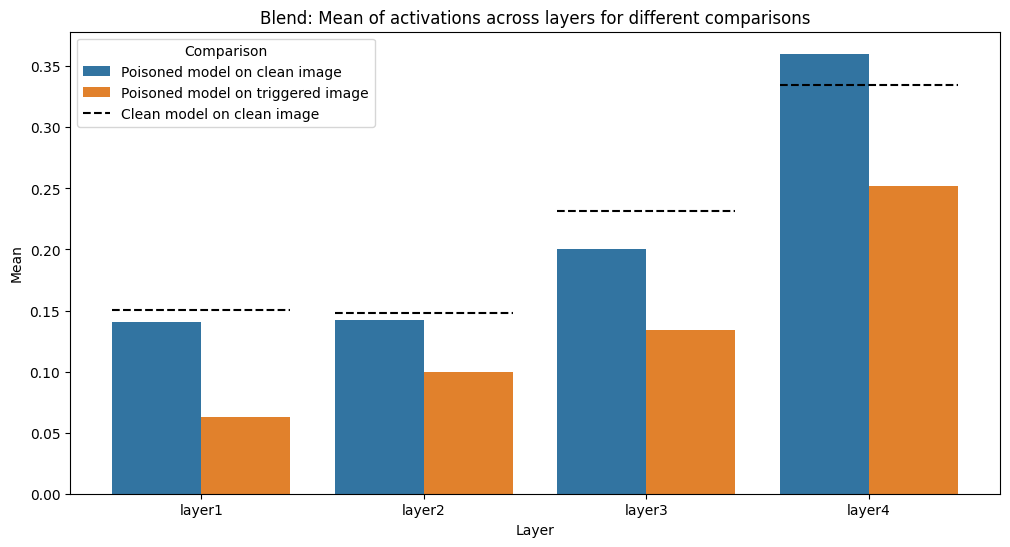

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plot
# Filter to just the bar comparisons
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Activation_Badnet_Resnet/metrics_badnet_patched.csv')

# Set categorical order

df['Layer'] = pd.Categorical(df['Layer'], categories=[f'layer{i+1}' for i in range(4)], ordered=True)

# Separate into 3 groups
sum_clean = df[['Layer', 'Mean_Clean']].copy()
sum_clean['Comparison'] = 'Clean Baseline'
sum_clean.rename(columns={'Mean_Clean': 'Mean'}, inplace=True)

sum_comparisons = df[['Layer', 'Comparison', 'Mean']].copy()

# Combine all
combined_df = pd.concat([sum_comparisons, sum_clean], ignore_index=True)
df_bar = df[df['Comparison'].isin(['Clean vs Poisoned', 'Poisoned Clean vs Triggered'])]
label_map = {
    'Clean vs Poisoned': 'Poisoned model on clean image',
    'Poisoned Clean vs Triggered': 'Poisoned model on triggered image'
}
hue_order = list(label_map.keys())

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_bar, x='Layer', y='Mean', hue='Comparison',
                 hue_order=hue_order, estimator='mean', ci=None)

# Overlay dashed clean baseline
clean_means = df.groupby('Layer')['Mean_Clean'].mean()
dashed_handle = None
for i, layer in enumerate(clean_means.index):
    line = plt.hlines(y=clean_means[layer], xmin=i - 0.4, xmax=i + 0.4,
                      colors='black', linestyles='dashed')
    if i == 0:
        dashed_handle = line

# Fix legend
handles, labels = ax.get_legend_handles_labels()
custom_labels = [label_map.get(l, l) for l in labels]
handles.append(dashed_handle)
custom_labels.append('Clean model on clean image')

plt.legend(handles=handles, labels=custom_labels, title='Comparison')
plt.title('Blend: Mean of activations across layers for different comparisons')



/tmp/ipython-input-6-2803959198.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_bar, x='Layer', y='Mean', hue='Comparison',
/tmp/ipython-input-6-2803959198.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_means = df.groupby('Layer')['Mean_Clean'].mean()
/tmp/ipython-input-6-2803959198.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(layer_labels, fontsize=12)


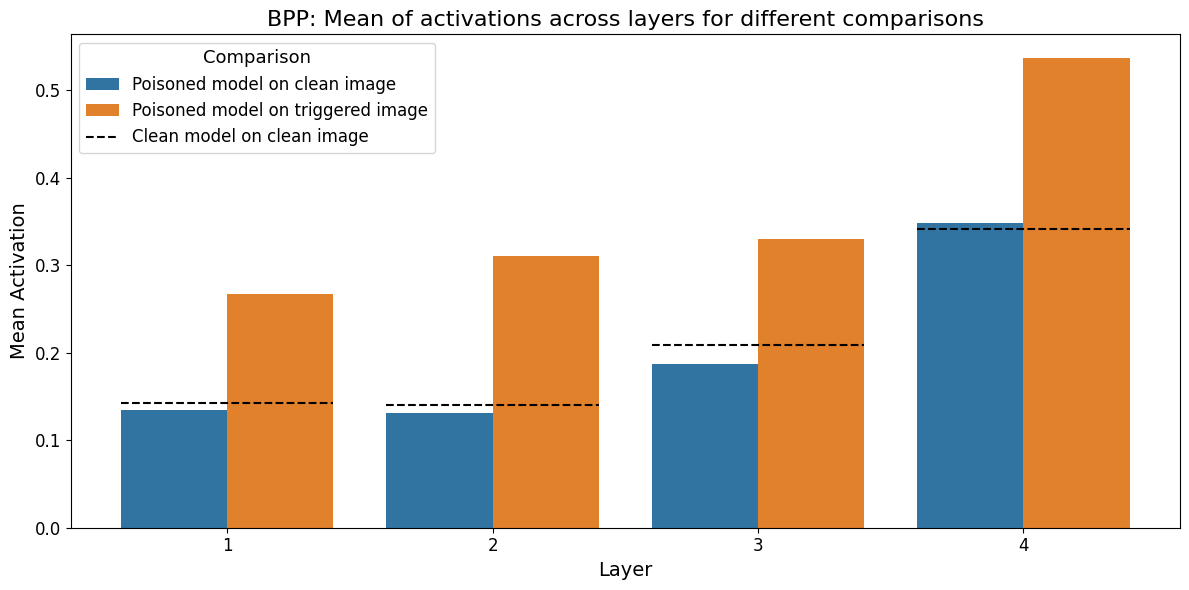

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Activations_Bpp_Resnet/metrics_bpp.csv')

# Set categorical order and simplify layer names to 1, 2, 3, 4
df['Layer'] = pd.Categorical(df['Layer'], categories=[f'layer{i+1}' for i in range(4)], ordered=True)
layer_labels = ['1', '2', '3', '4']

# Filter the comparisons
df_bar = df[df['Comparison'].isin(['Clean vs Poisoned', 'Poisoned Clean vs Triggered'])]
label_map = {
    'Clean vs Poisoned': 'Poisoned model on clean image',
    'Poisoned Clean vs Triggered': 'Poisoned model on triggered image'
}
hue_order = list(label_map.keys())

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_bar, x='Layer', y='Mean', hue='Comparison',
                 hue_order=hue_order, estimator='mean', ci=None)

# Overlay dashed clean baseline
clean_means = df.groupby('Layer')['Mean_Clean'].mean()
dashed_handle = None
for i, layer in enumerate(clean_means.index):
    line = plt.hlines(y=clean_means[layer], xmin=i - 0.4, xmax=i + 0.4,
                      colors='black', linestyles='dashed')
    if i == 0:
        dashed_handle = line

# Adjust labels and font sizes
ax.set_title('BPP: Mean of activations across layers for different comparisons', fontsize=16)
ax.set_xlabel('Layer', fontsize=14)
ax.set_ylabel('Mean Activation', fontsize=14)
ax.set_xticklabels(layer_labels, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Update legend
handles, labels = ax.get_legend_handles_labels()
custom_labels = [label_map.get(l, l) for l in labels]
handles.append(dashed_handle)
custom_labels.append('Clean model on clean image')

plt.legend(handles=handles, labels=custom_labels, title='Comparison', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

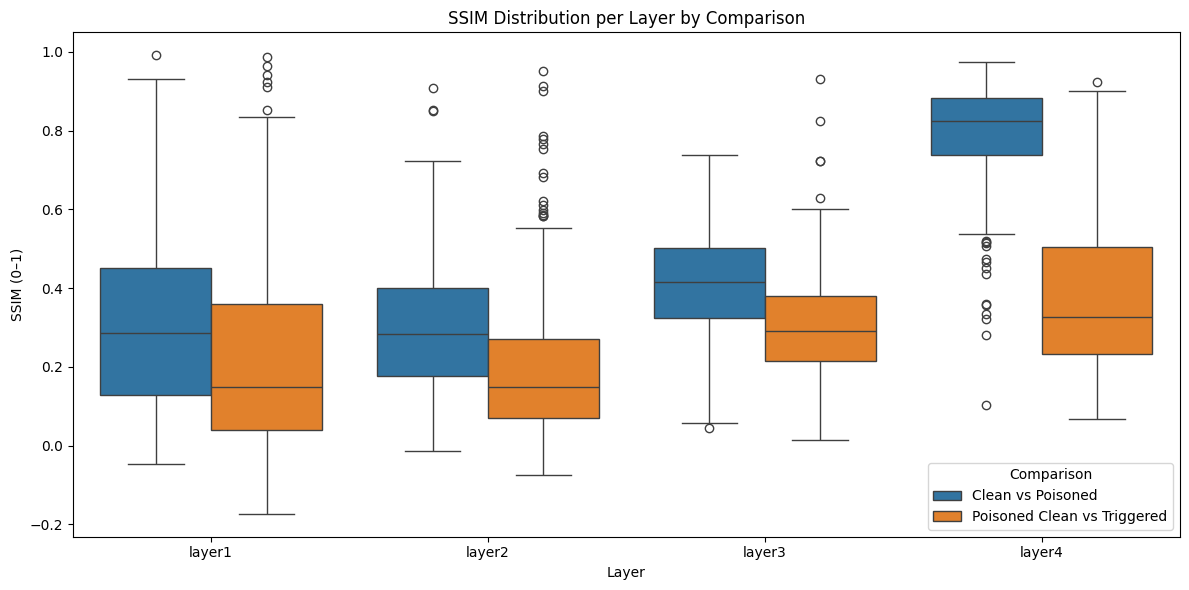

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Activation_Badnet_Resnet/metrics_badnet_patched.csv')

# Ensure ordered layers
df['Layer'] = pd.Categorical(df['Layer'], categories=[f'layer{i+1}' for i in range(4)], ordered=True)

# Filter only the comparison types you want to show (optional)
ssim_df = df[df['Comparison'].isin(['Clean vs Poisoned', 'Poisoned Clean vs Triggered'])]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=ssim_df, x='Layer', y='SSIM', hue='Comparison')

plt.title('SSIM Distribution per Layer by Comparison')
plt.ylabel('SSIM (0–1)')
plt.xlabel('Layer')
plt.legend(title='Comparison')  # Uses original labels as-is
plt.tight_layout()
plt.show()


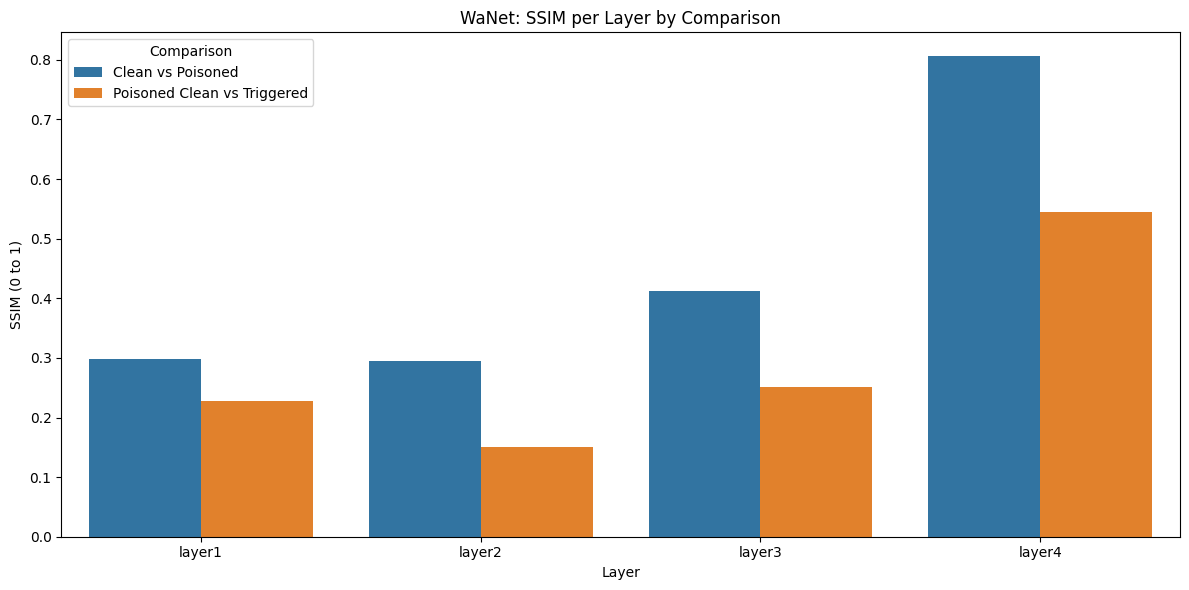

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Activations_WaNet_Resnet/metrics_wanet.csv')

# Ensure layer order
df['Layer'] = pd.Categorical(df['Layer'], categories=[f'layer{i+1}' for i in range(4)], ordered=True)

# Optional: restrict to comparisons of interest
cos_df = df[df['Comparison'].isin(['Clean vs Poisoned', 'Poisoned Clean vs Triggered'])]

# Barplot of cosine similarity
plt.figure(figsize=(12, 6))
sns.barplot(data=cos_df, x='Layer', y='SSIM', hue='Comparison', errorbar=None)

plt.title('WaNet: SSIM per Layer by Comparison')
plt.ylabel('SSIM (0 to 1)')
plt.xlabel('Layer')
plt.legend(title='Comparison')
plt.tight_layout()
plt.show()

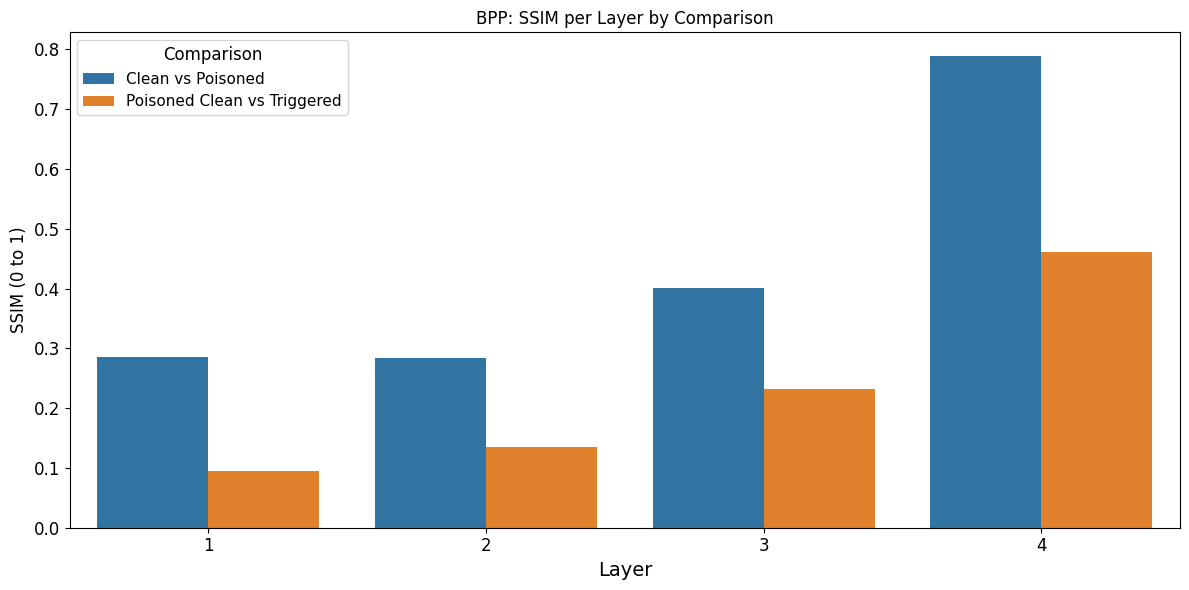

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Activations_Bpp_Resnet/metrics_bpp.csv')

# Rename layers for simplicity and adjust order
layer_map = {f'layer{i+1}': str(i+1) for i in range(4)}
df['Layer'] = df['Layer'].map(layer_map)
df['Layer'] = pd.Categorical(df['Layer'], categories=[str(i+1) for i in range(4)], ordered=True)

# Optional: restrict to comparisons of interest
cos_df = df[df['Comparison'].isin(['Clean vs Poisoned', 'Poisoned Clean vs Triggered'])]

# Plot with adjusted font sizes
plt.figure(figsize=(12, 6))
sns.barplot(data=cos_df, x='Layer', y='SSIM', hue='Comparison', errorbar=None)

plt.title('BPP: SSIM per Layer by Comparison')
plt.ylabel('SSIM (0 to 1)', fontsize=12)
plt.xlabel('Layer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Comparison', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-21-fef8ed0a1cb1>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=cos_df, x='Layer', y='Cosine', hue='Comparison', ci='sd')


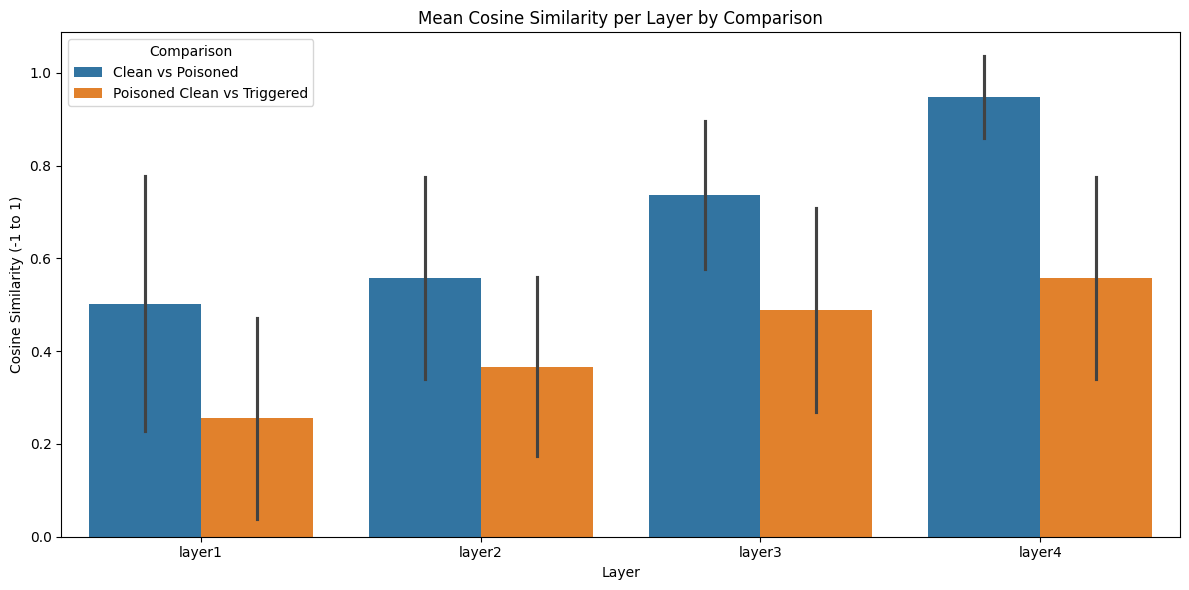

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Activation_Badnet_Resnet/metrics_badnet_patched.csv')

# Ensure layer order
df['Layer'] = pd.Categorical(df['Layer'], categories=[f'layer{i+1}' for i in range(4)], ordered=True)

# Optional: restrict to comparisons of interest
cos_df = df[df['Comparison'].isin(['Clean vs Poisoned', 'Poisoned Clean vs Triggered'])]

# Barplot of cosine similarity
plt.figure(figsize=(12, 6))
sns.barplot(data=cos_df, x='Layer', y='Cosine', hue='Comparison', ci='sd')

plt.title('Mean Cosine Similarity per Layer by Comparison')
plt.ylabel('Cosine Similarity (-1 to 1)')
plt.xlabel('Layer')
plt.legend(title='Comparison')
plt.tight_layout()
plt.show()


<ipython-input-23-f319bde97ab4>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=mse_df, x='Layer', y='MSE', hue='Comparison', ci='sd')


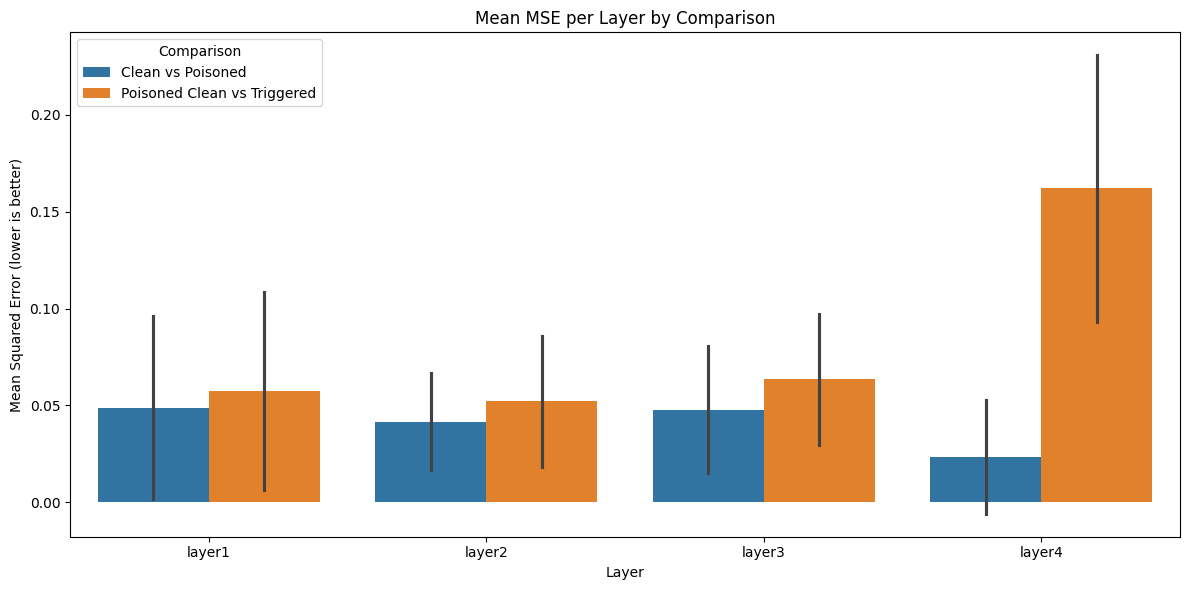

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Activation_Badnet_Resnet/metrics_badnet_patched.csv')

# Order layer column
df['Layer'] = pd.Categorical(df['Layer'], categories=[f'layer{i+1}' for i in range(4)], ordered=True)

# Filter to main comparisons
mse_df = df[df['Comparison'].isin(['Clean vs Poisoned', 'Poisoned Clean vs Triggered'])]

# Plot barplot of mean MSE
plt.figure(figsize=(12, 6))
sns.barplot(data=mse_df, x='Layer', y='MSE', hue='Comparison', ci='sd')

plt.title('Mean MSE per Layer by Comparison')
plt.ylabel('Mean Squared Error (lower is better)')
plt.xlabel('Layer')
plt.legend(title='Comparison')
plt.tight_layout()
plt.show()


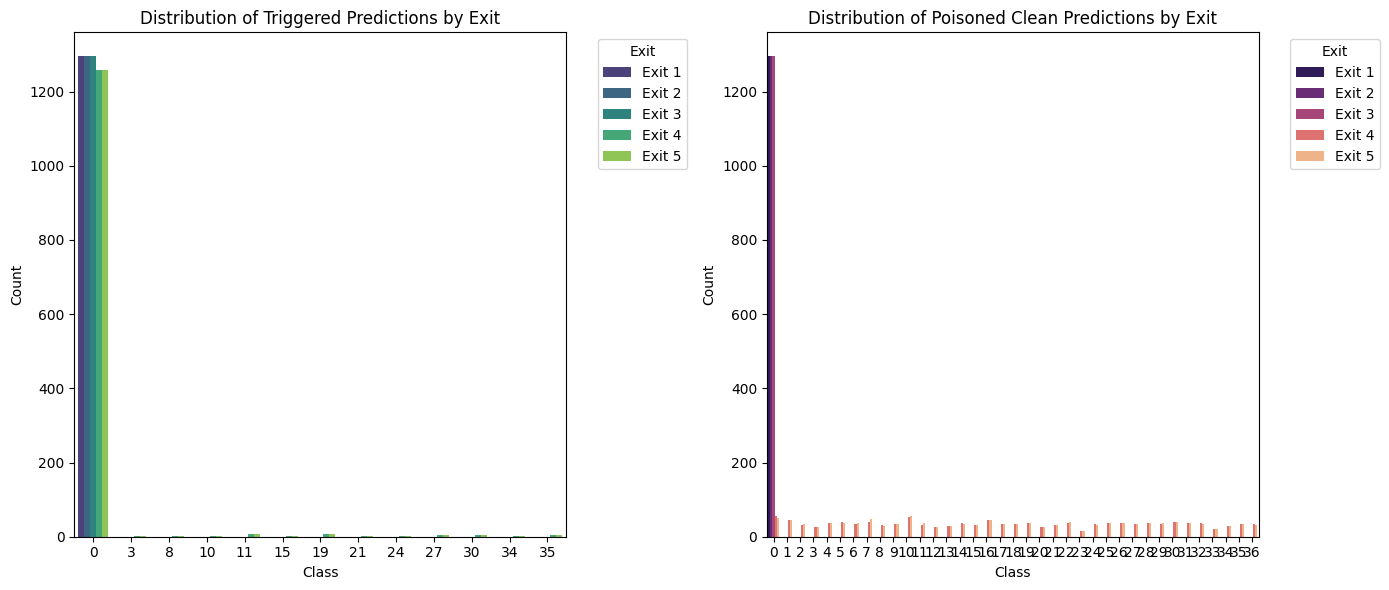

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Attempt to load the correct CSV file
file_path = "/content/drive/MyDrive/Colab Notebooks/exit_comparison537badnetVSclean.csv"
df = pd.read_csv(file_path)

# Check for required columns
required_columns = ['Exit', 'Triggered Prediction', 'Poisoned Clean Prediction']
if all(col in df.columns for col in required_columns):
    # Set up the plotting environment
    plt.figure(figsize=(14, 6))

    # Plot distribution of Triggered Predictions
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='Triggered Prediction', hue='Exit', palette='viridis')
    plt.title('Distribution of Triggered Predictions by Exit')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot distribution of Poisoned Clean Predictions
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='Poisoned Clean Prediction', hue='Exit', palette='magma')
    plt.title('Distribution of Poisoned Clean Predictions by Exit')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
else:
    missing = [col for col in required_columns if col not in df.columns]
    print(f"Missing required columns in the dataset: {missing}")


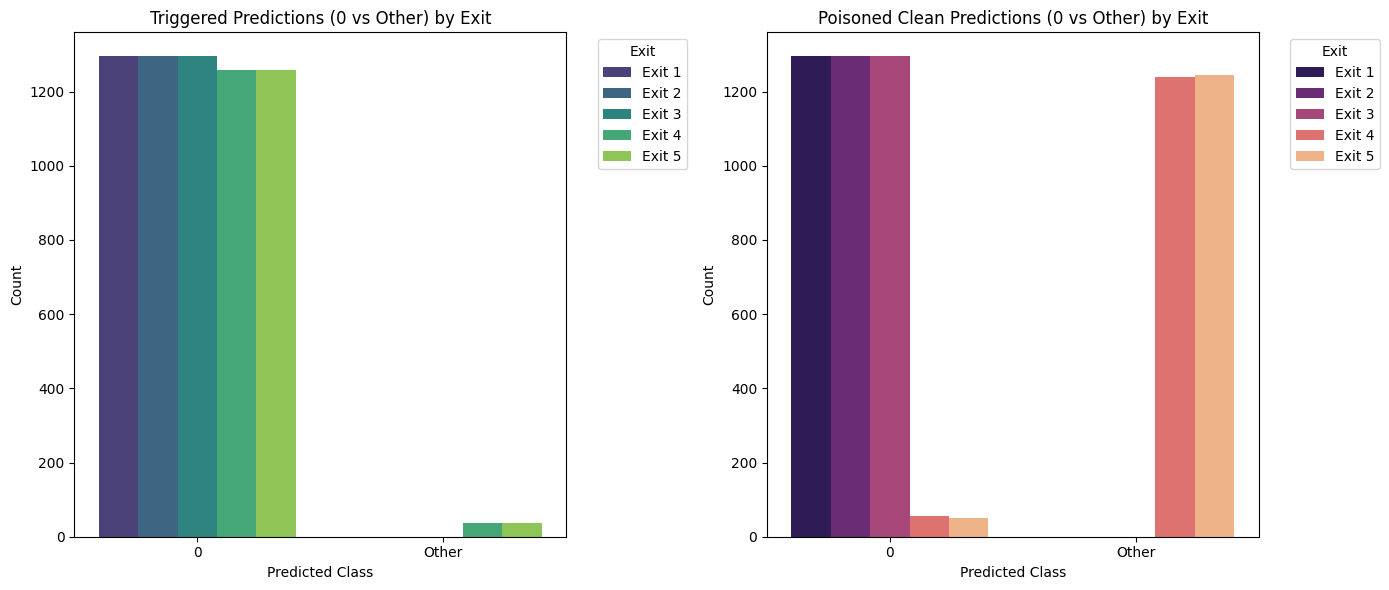

In [ ]:
# Re-import required packages after environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (you'll need to re-upload it since the environment reset)
file_path = "/content/drive/MyDrive/Colab Notebooks/exit_comparison537badnetVSclean.csv"

# Try loading again after confirming the file is present
try:
    df = pd.read_csv(file_path)

    # Function to bucket predictions into '0' and 'Other'
    def bucket_classes(column):
        return column.apply(lambda x: '0' if x == 0 else 'Other')

    # Apply bucketing
    df['Triggered Grouped'] = bucket_classes(df['Triggered Prediction'])
    df['Poisoned Clean Grouped'] = bucket_classes(df['Poisoned Clean Prediction'])

    # Set up plotting
    plt.figure(figsize=(14, 6))

    # Plot Triggered Grouped predictions
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='Triggered Grouped', hue='Exit', palette='viridis')
    plt.title('Triggered Predictions (0 vs Other) by Exit')
    plt.xlabel('Predicted Class')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Poisoned Clean Grouped predictions
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='Poisoned Clean Grouped', hue='Exit', palette='magma')
    plt.title('Poisoned Clean Predictions (0 vs Other) by Exit')
    plt.xlabel('Predicted Class')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("The required CSV file is missing. Please upload 'exit_comparison537badnetVSclean.csv'.")


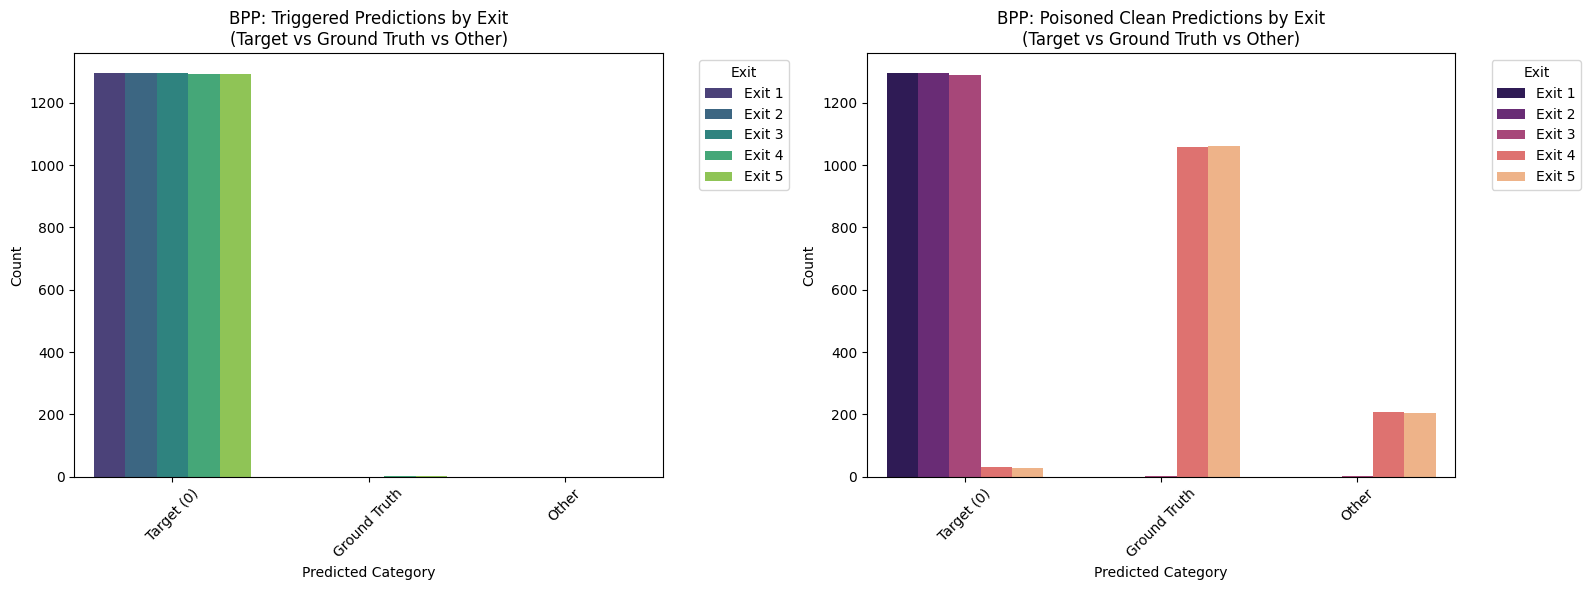

Triggered Predictions Distribution:
Triggered Categorized  Ground Truth  Target (0)
Exit                                           
Exit 1                            0        1295
Exit 2                            0        1295
Exit 3                            0        1295
Exit 4                            3        1292
Exit 5                            3        1292

Poisoned Clean Predictions Distribution:
Poisoned Clean Categorized  Ground Truth  Other  Target (0)
Exit                                                       
Exit 1                                 0      0        1295
Exit 2                                 0      0        1295
Exit 3                                 2      3        1290
Exit 4                              1059    206          30
Exit 5                              1062    205          28

=== Analysis ===
Exit Exit 1: ASR = 100.0%, Clean Accuracy = 0.0%
Exit Exit 2: ASR = 100.0%, Clean Accuracy = 0.0%
Exit Exit 3: ASR = 100.0%, Clean Accuracy = 0.2%
E

In [ ]:
# Re-import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/exit_comparison_bppVSclean.csv"

try:
    df = pd.read_csv(file_path)

    # Function to categorize predictions into '0', 'Ground Truth', and 'Other'
    def categorize_predictions(row, prediction_column):
        prediction = row[prediction_column]
        ground_truth = row['Ground Truth']

        if prediction == 0:
            return 'Target (0)'
        elif prediction == ground_truth:
            return 'Ground Truth'
        else:
            return 'Other'

    # Apply categorization
    df['Triggered Categorized'] = df.apply(lambda row: categorize_predictions(row, 'Triggered Prediction'), axis=1)
    df['Poisoned Clean Categorized'] = df.apply(lambda row: categorize_predictions(row, 'Poisoned Clean Prediction'), axis=1)

    # Set up plotting
    plt.figure(figsize=(16, 6))

    # Define color palette
    colors = ['#e74c3c', '#2ecc71', '#95a5a6']  # Red for Target(0), Green for Ground Truth, Gray for Other

    # Plot Triggered Categorized predictions
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='Triggered Categorized', hue='Exit',
                  palette='viridis', order=['Target (0)', 'Ground Truth', 'Other'])
    plt.title('BPP: Triggered Predictions by Exit\n(Target vs Ground Truth vs Other)')
    plt.xlabel('Predicted Category')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    # Plot Poisoned Clean Categorized predictions
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='Poisoned Clean Categorized', hue='Exit',
                  palette='magma', order=['Target (0)', 'Ground Truth', 'Other'])
    plt.title('BPP: Poisoned Clean Predictions by Exit\n(Target vs Ground Truth vs Other)')
    plt.xlabel('Predicted Category')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print some summary statistics
    print("Triggered Predictions Distribution:")
    print(df.groupby(['Exit', 'Triggered Categorized']).size().unstack(fill_value=0))
    print("\nPoisoned Clean Predictions Distribution:")
    print(df.groupby(['Exit', 'Poisoned Clean Categorized']).size().unstack(fill_value=0))

    # Calculate success rates
    print("\n=== Analysis ===")
    for exit_num in sorted(df['Exit'].unique()):
        exit_data = df[df['Exit'] == exit_num]

        # For triggered samples
        triggered_target = len(exit_data[exit_data['Triggered Categorized'] == 'Target (0)'])
        triggered_total = len(exit_data)
        triggered_asr = (triggered_target / triggered_total) * 100 if triggered_total > 0 else 0

        # For poisoned clean samples
        clean_correct = len(exit_data[exit_data['Poisoned Clean Categorized'] == 'Ground Truth'])
        clean_accuracy = (clean_correct / triggered_total) * 100 if triggered_total > 0 else 0

        print(f"Exit {exit_num}: ASR = {triggered_asr:.1f}%, Clean Accuracy = {clean_accuracy:.1f}%")

except FileNotFoundError:
    print("The required CSV file is missing. Please upload 'exit_comparison537badnetVSclean.csv'.")
except Exception as e:
    print(f"An error occurred: {e}")

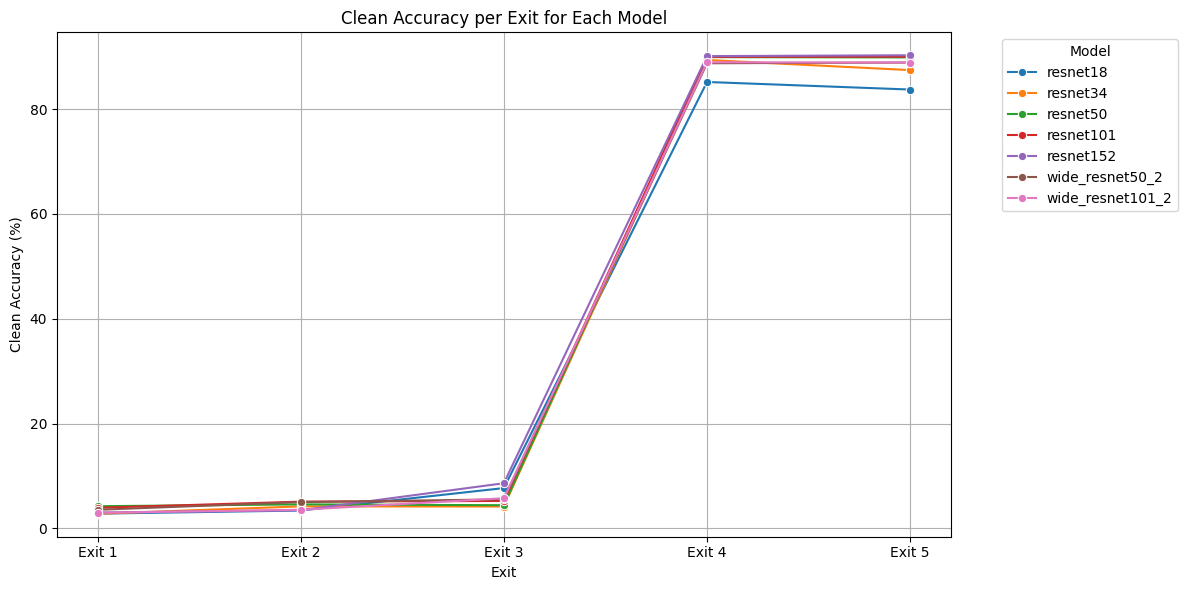

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV containing clean accuracy per exit and model
csv_path = "/content/drive/MyDrive/Colab Notebooks/EEResNet_Clean_ExitHeads/clean_exit_metrics.csv"
df = pd.read_csv(csv_path)

# Ensure exit order for consistent plotting
exit_order = [f'Exit {i}' for i in range(1, 6)]
df['Exit'] = pd.Categorical(df['Exit'], categories=exit_order, ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Exit', y='Clean Accuracy', hue='Model', marker='o')
plt.title('Clean Accuracy per Exit for Each Model')
plt.ylabel('Clean Accuracy (%)')
plt.xlabel('Exit')
plt.grid(True)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


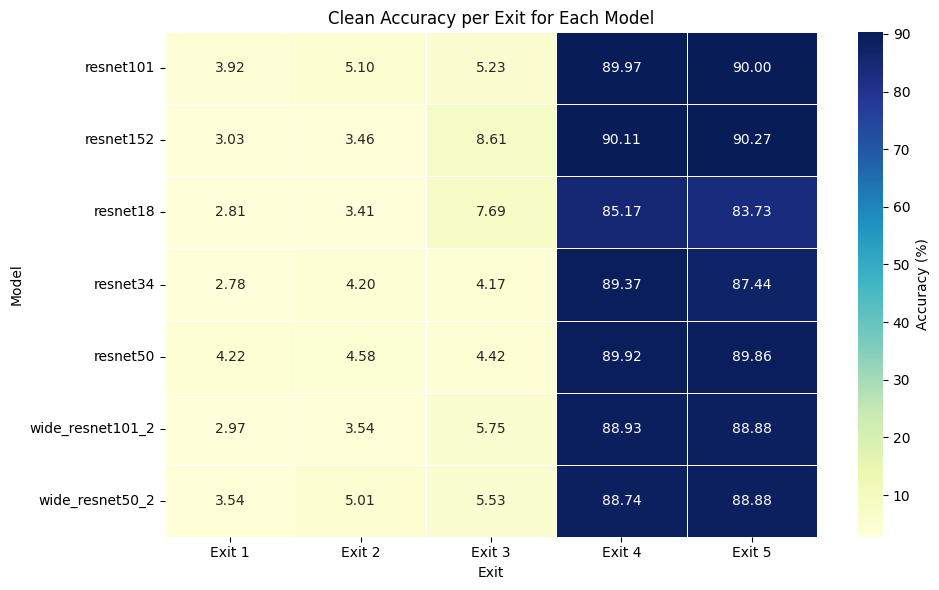

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EEResNet_Clean_ExitHeads/clean_exit_metrics.csv")

# Pivot so rows = models, columns = exits
heatmap_data = df.pivot(index='Model', columns='Exit', values='Clean Accuracy')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Accuracy (%)'})

plt.title('Clean Accuracy per Exit for Each Model')
plt.ylabel('Model')
plt.xlabel('Exit')
plt.tight_layout()
plt.show()


<ipython-input-3-c682c7244515>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=avg_acc, x='Exit', y='Clean Accuracy', palette='viridis')


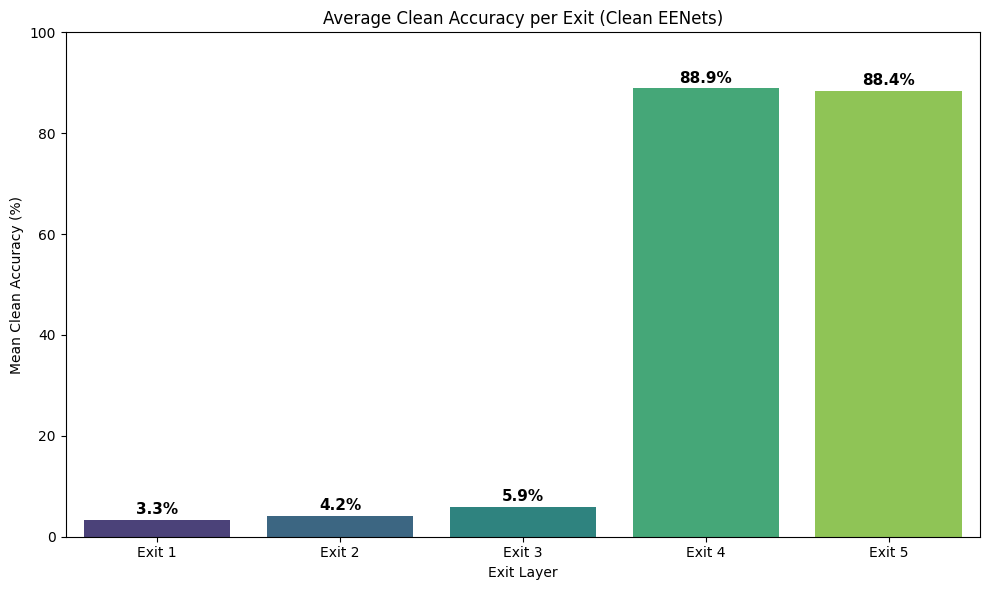

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV (update the path if needed)
path = '/content/drive/MyDrive/Colab Notebooks/EEResNet_Clean_ExitHeads/clean_exit_metrics.csv'
df = pd.read_csv(path)

# Group by exit and calculate mean accuracy
avg_acc = df.groupby('Exit')['Clean Accuracy'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=avg_acc, x='Exit', y='Clean Accuracy', palette='viridis')

# Add value labels on top of bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Average Clean Accuracy per Exit (Clean EENets)')
plt.ylabel('Mean Clean Accuracy (%)')
plt.xlabel('Exit Layer')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

<ipython-input-5-34ac6ac7a433>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="Exit", y="Value", hue="Metric", ci=None)


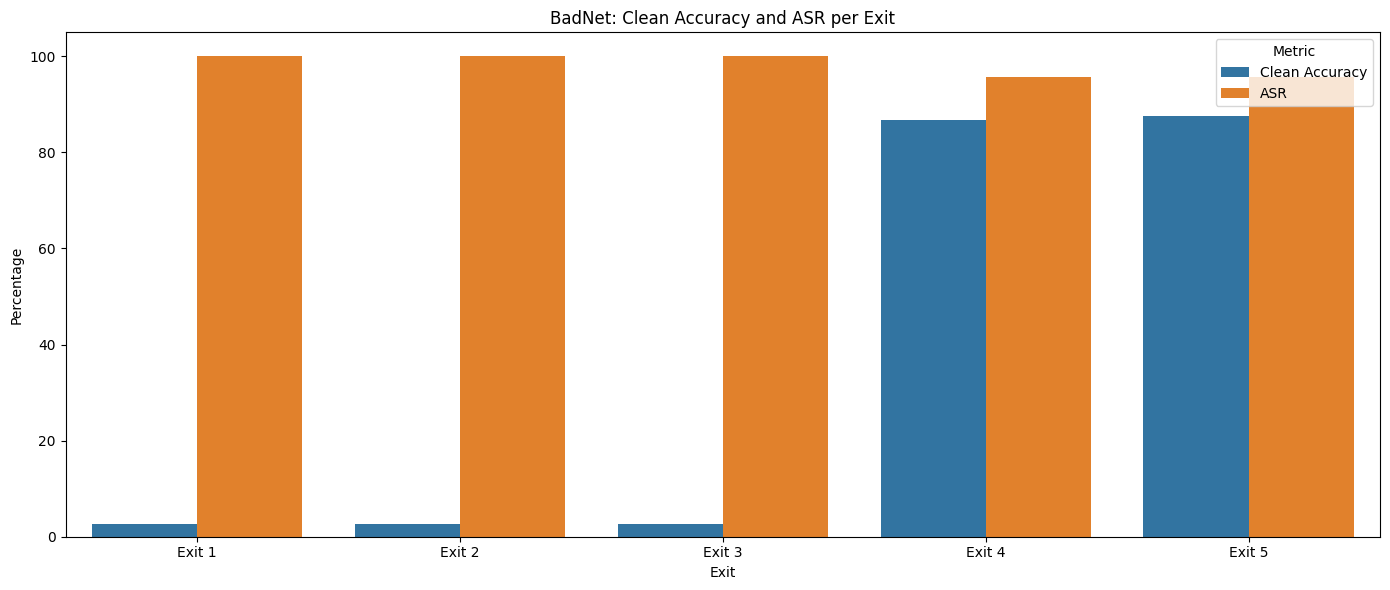

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the BadNet exit metrics CSV
badnet_metrics_path = "/content/drive/MyDrive/Colab Notebooks/EEResNet_Badnet_ExitHeads/badnet_exit_metrics.csv"
df_badnet = pd.read_csv(badnet_metrics_path)

# Convert Exit column to ensure proper order
df_badnet["Exit"] = pd.Categorical(df_badnet["Exit"], categories=[f"Exit {i}" for i in range(1, 6)], ordered=True)

# Melt the dataframe to long format for plotting both Accuracy and ASR
df_melted = df_badnet.melt(id_vars=["Model", "Exit"], value_vars=["Clean Accuracy", "ASR"],
                           var_name="Metric", value_name="Value")

# Create the grouped bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x="Exit", y="Value", hue="Metric", ci=None)

plt.title("BadNet: Clean Accuracy and ASR per Exit")
plt.ylabel("Percentage")
plt.xlabel("Exit")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


<ipython-input-7-80b67951f06f>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="Exit", y="Value", hue="Metric", ci=None)


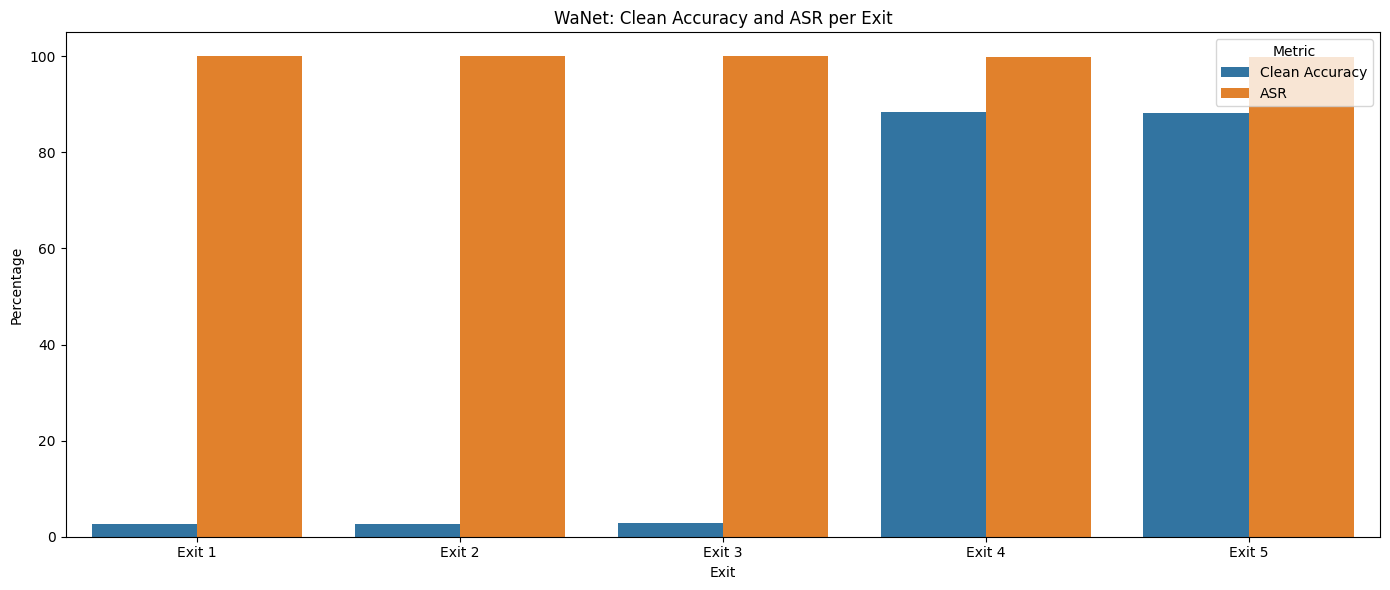

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the BadNet exit metrics CSV
badnet_metrics_path = "/content/drive/MyDrive/Colab Notebooks/EEResNet_WaNet_ExitHeads/wanet_exit_metrics.csv"
df_badnet = pd.read_csv(badnet_metrics_path)

# Convert Exit column to ensure proper order
df_badnet["Exit"] = pd.Categorical(df_badnet["Exit"], categories=[f"Exit {i}" for i in range(1, 6)], ordered=True)

# Melt the dataframe to long format for plotting both Accuracy and ASR
df_melted = df_badnet.melt(id_vars=["Model", "Exit"], value_vars=["Clean Accuracy", "ASR"],
                           var_name="Metric", value_name="Value")

# Create the grouped bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x="Exit", y="Value", hue="Metric", ci=None)

plt.title("WaNet: Clean Accuracy and ASR per Exit")
plt.ylabel("Percentage")
plt.xlabel("Exit")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

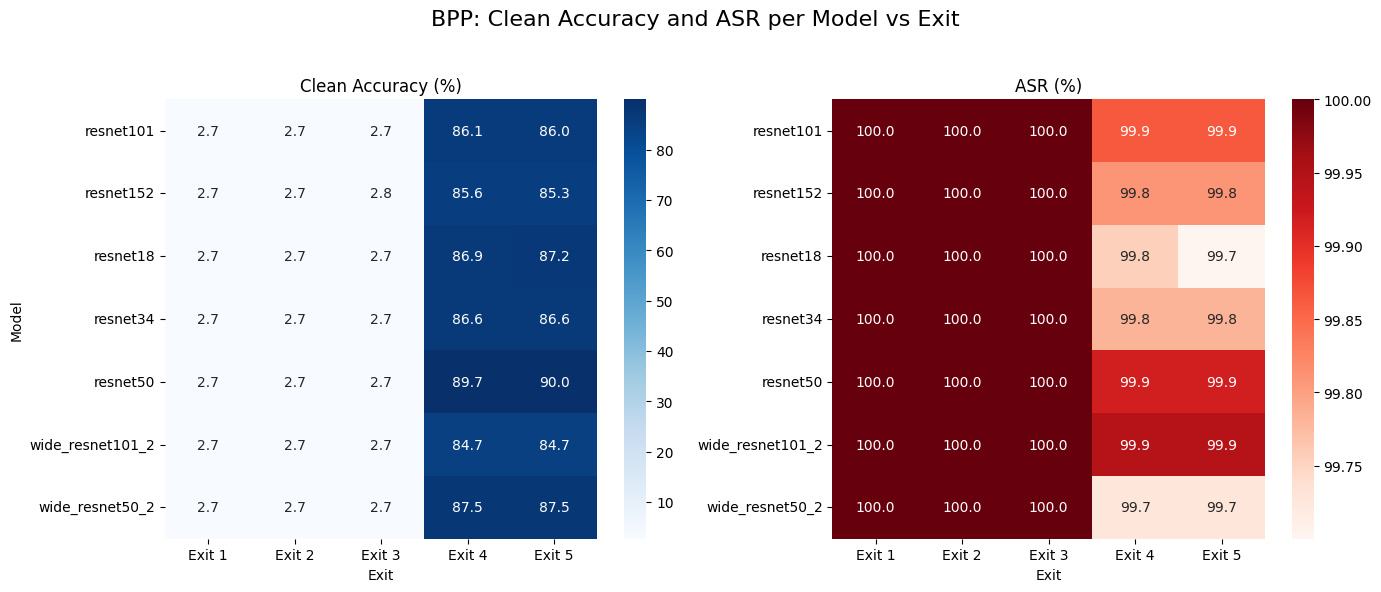

In [ ]:
# Re-import necessary packages after state reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Re-load the BadNet exit metrics CSV
badnet_metrics_path = "/content/drive/MyDrive/Colab Notebooks/EEResNet_Bpp_ExitHeads/bpp_exit_metrics.csv"
df = pd.read_csv(badnet_metrics_path)

# Pivot for Accuracy
acc_pivot = df.pivot(index='Model', columns='Exit', values='Clean Accuracy')

# Pivot for ASR
asr_pivot = df.pivot(index='Model', columns='Exit', values='ASR')

# Plotting
plt.figure(figsize=(14, 6))
plt.suptitle('BPP: Clean Accuracy and ASR per Model vs Exit', fontsize=16)

# Clean Accuracy Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(acc_pivot, annot=True, fmt=".1f", cmap='Blues')
plt.title('Clean Accuracy (%)')
plt.xlabel('Exit')
plt.ylabel('Model')

# ASR Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(asr_pivot, annot=True, fmt=".1f", cmap='Reds')
plt.title('ASR (%)')
plt.xlabel('Exit')
plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


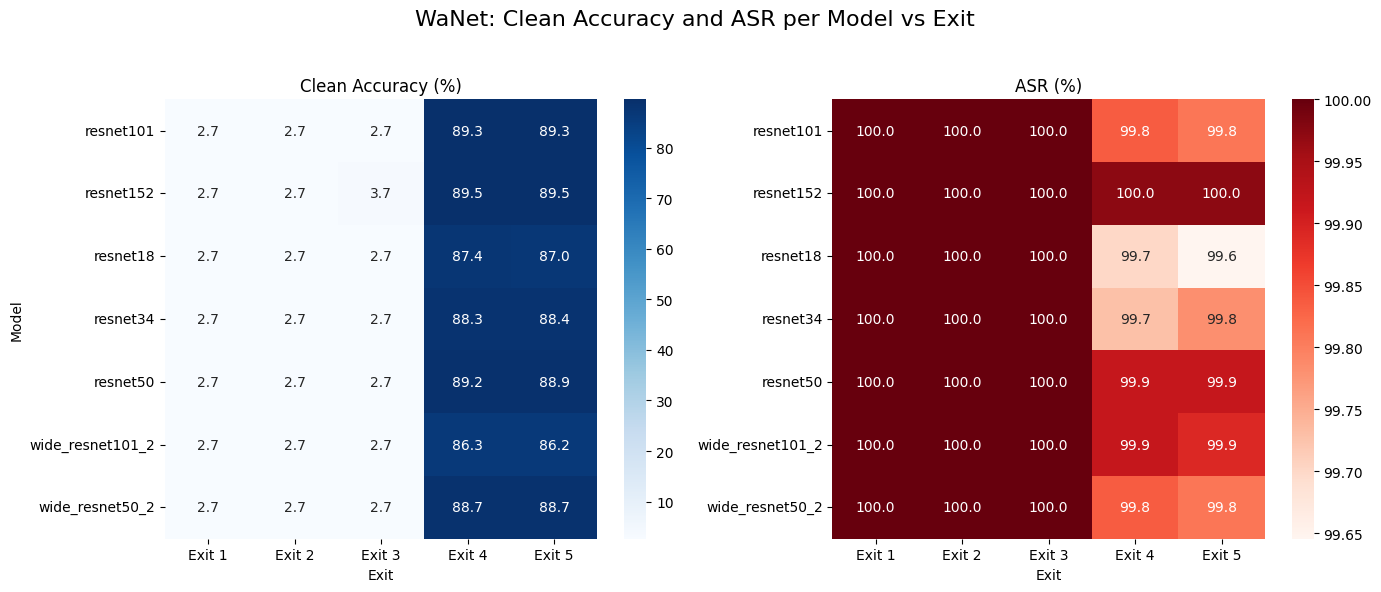

In [ ]:
# Re-import necessary packages after state reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Re-load the BadNet exit metrics CSV
badnet_metrics_path = "/content/drive/MyDrive/Colab Notebooks/EEResNet_WaNet_ExitHeads/wanet_exit_metrics.csv"
df = pd.read_csv(badnet_metrics_path)

# Pivot for Accuracy
acc_pivot = df.pivot(index='Model', columns='Exit', values='Clean Accuracy')

# Pivot for ASR
asr_pivot = df.pivot(index='Model', columns='Exit', values='ASR')

# Plotting
plt.figure(figsize=(14, 6))
plt.suptitle('WaNet: Clean Accuracy and ASR per Model vs Exit', fontsize=16)

# Clean Accuracy Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(acc_pivot, annot=True, fmt=".1f", cmap='Blues')
plt.title('Clean Accuracy (%)')
plt.xlabel('Exit')
plt.ylabel('Model')

# ASR Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(asr_pivot, annot=True, fmt=".1f", cmap='Reds')
plt.title('ASR (%)')
plt.xlabel('Exit')
plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

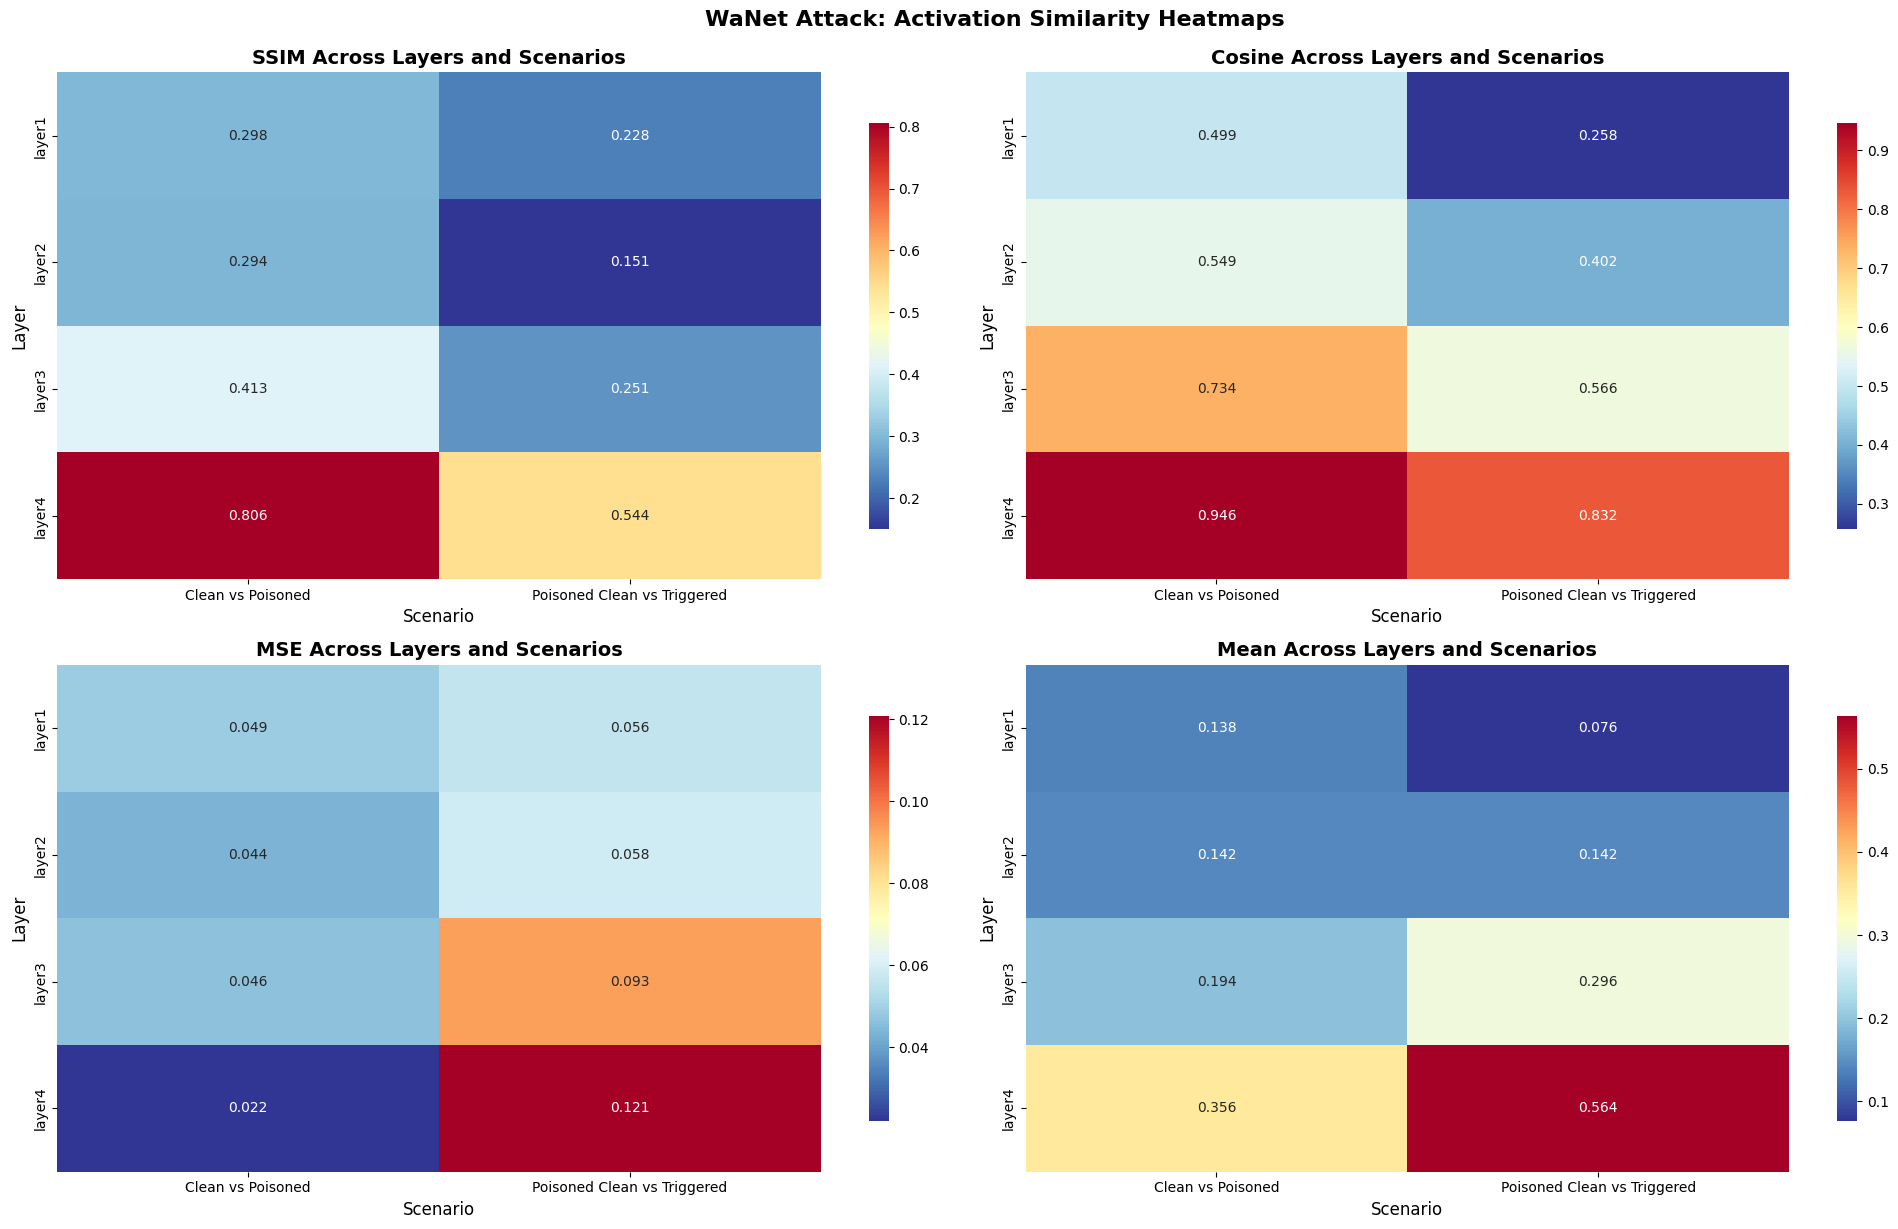

In [ ]:
# Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/Activations_WaNet_Resnet/metrics_wanet.csv'
df = pd.read_csv(path)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. LAYER-WISE ANALYSIS - Heatmap of similarity metrics across layers and scenarios
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
metrics = ['SSIM', 'Cosine', 'MSE', 'Mean']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]

    # Create pivot table for heatmap
    pivot_data = df.groupby(['Layer', 'Comparison'])[metric].mean().unstack()

    # Create heatmap
    sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap='RdYlBu_r', ax=ax, cbar_kws={'shrink': 0.8})
    ax.set_title(f'{metric} Across Layers and Scenarios', fontsize=14, fontweight='bold')
    ax.set_xlabel('Scenario', fontsize=12)
    ax.set_ylabel('Layer', fontsize=12)

plt.tight_layout()
plt.suptitle('WaNet Attack: Activation Similarity Heatmaps', fontsize=16, fontweight='bold', y=1.02)
plt.show()


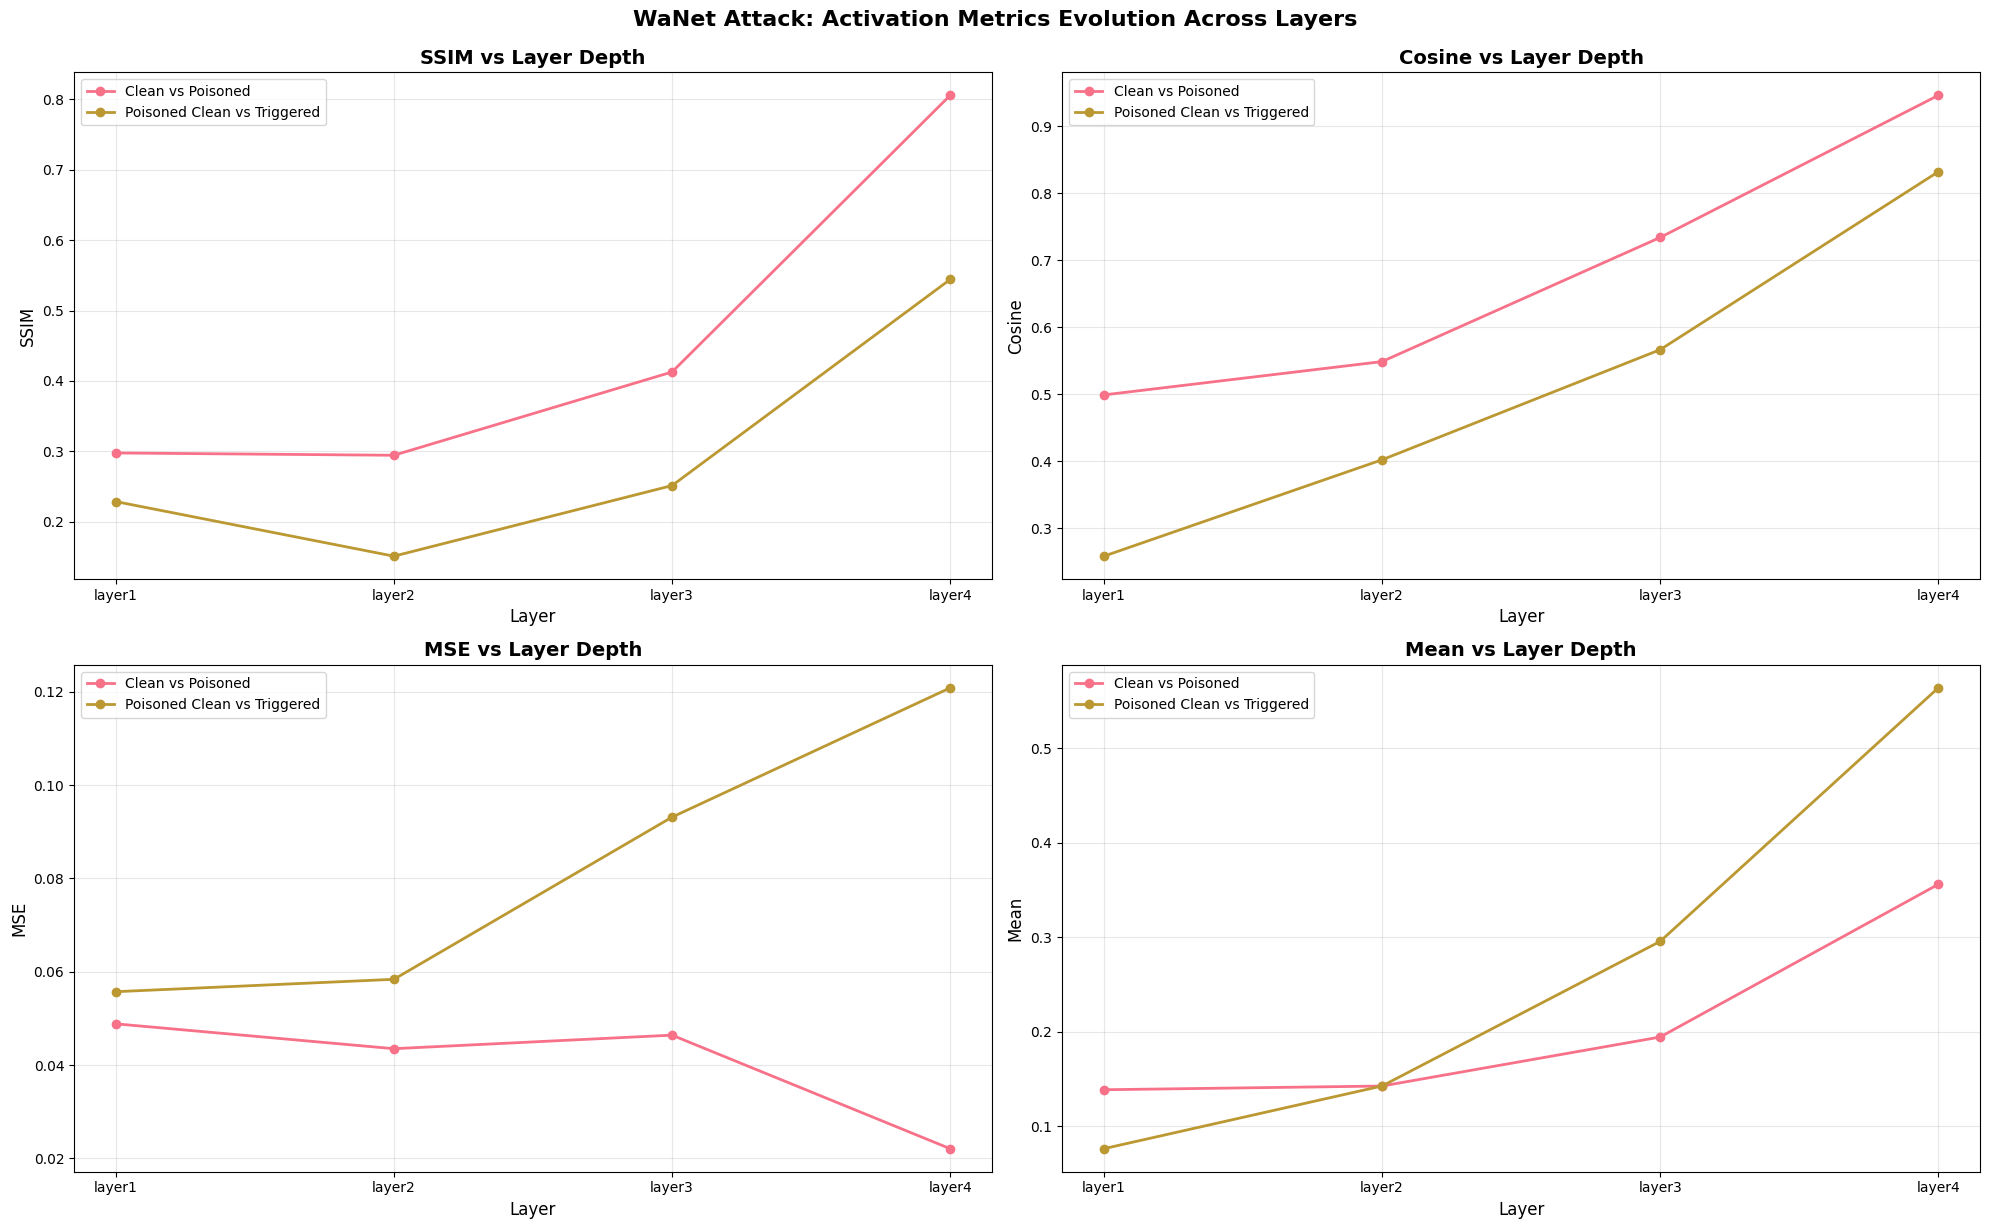

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
metrics = ['SSIM', 'Cosine', 'MSE', 'Mean']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]

    # Plot line for each comparison scenario
    for comparison in df['Comparison'].unique():
        data = df[df['Comparison'] == comparison].groupby('Layer')[metric].mean()
        ax.plot(data.index, data.values, marker='o', linewidth=2, markersize=6, label=comparison)

    ax.set_title(f'{metric} vs Layer Depth', fontsize=14, fontweight='bold')
    ax.set_xlabel('Layer', fontsize=12)
    ax.set_ylabel(f'{metric}', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('WaNet Attack: Activation Metrics Evolution Across Layers', fontsize=16, fontweight='bold', y=1.02)
plt.show()

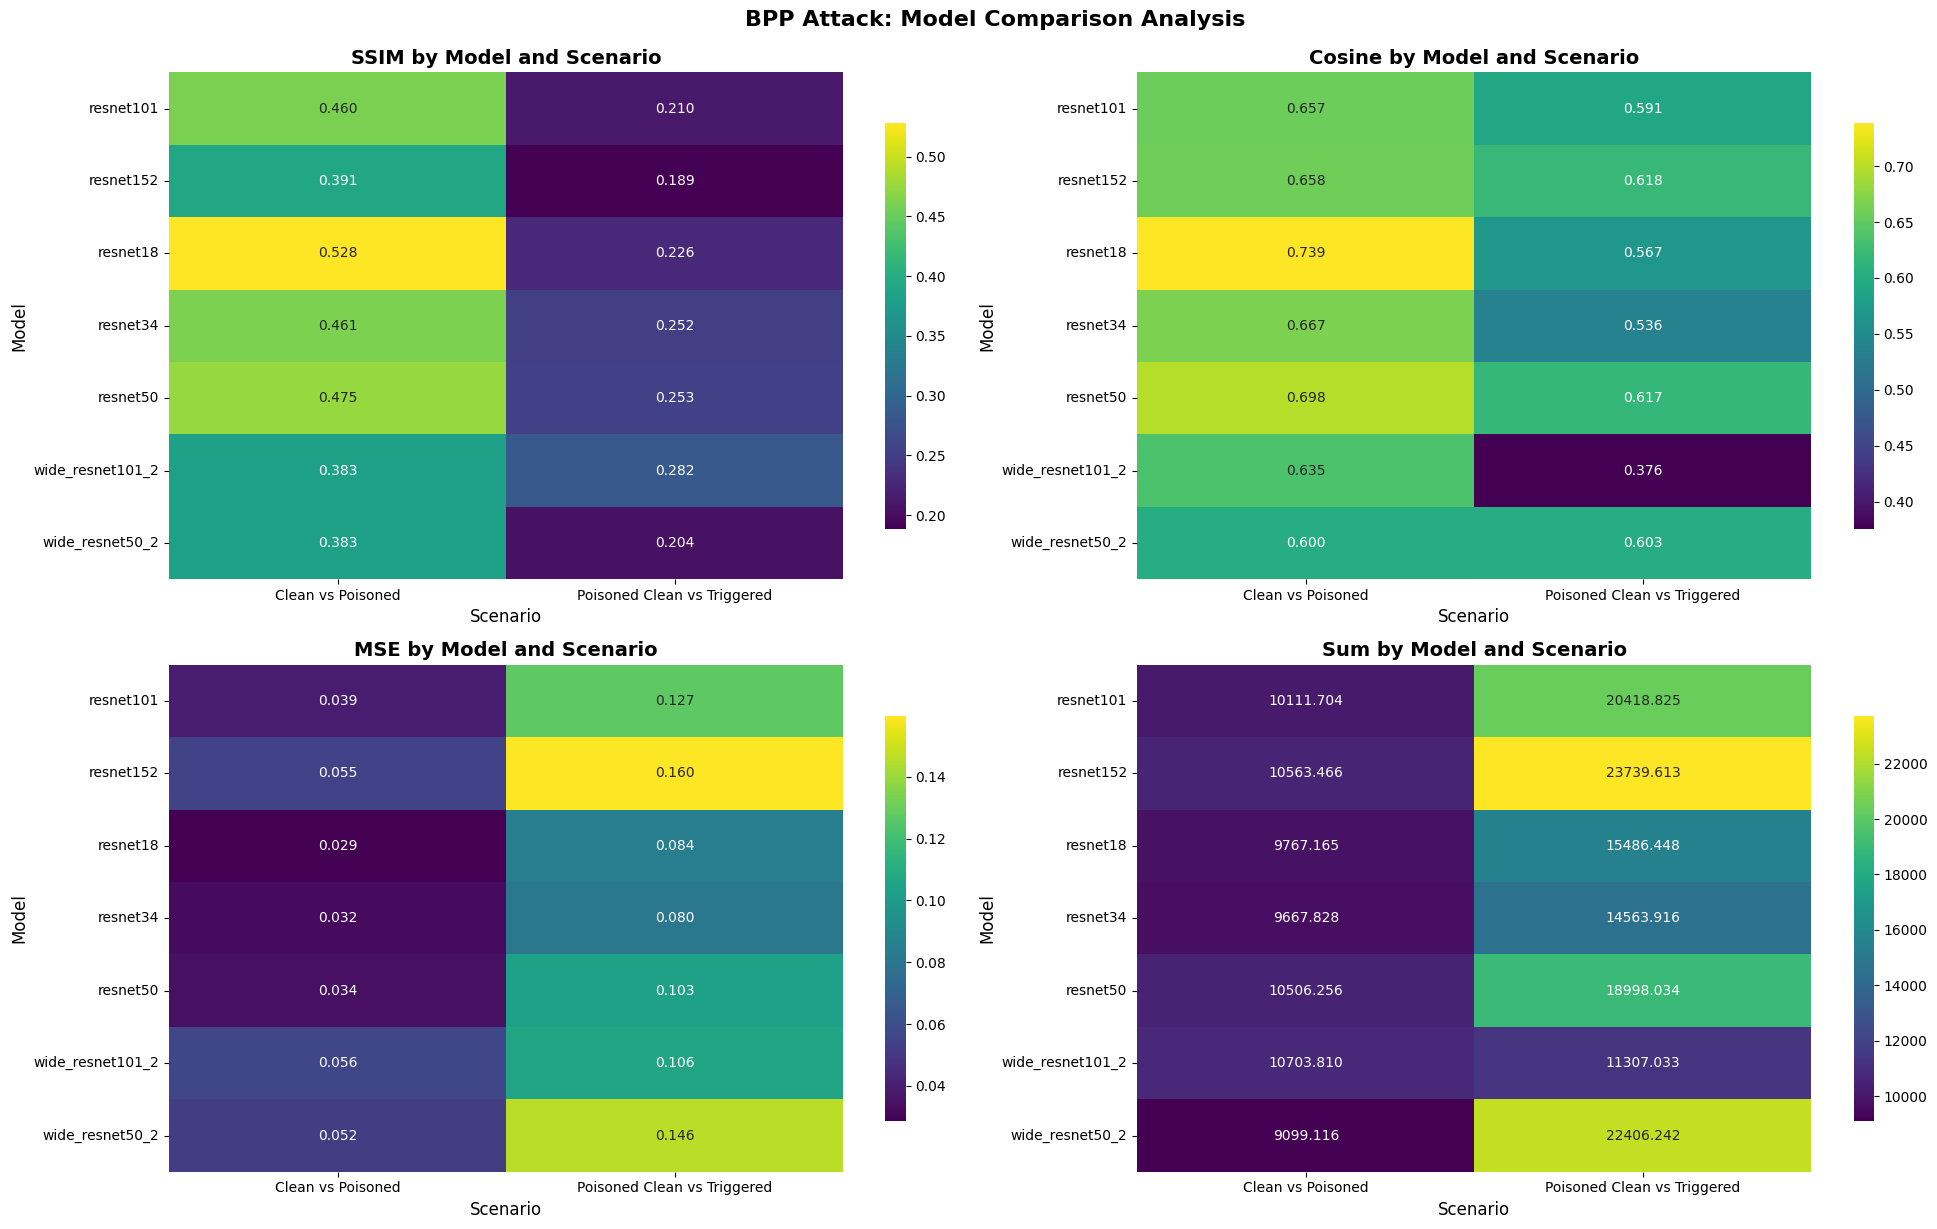

In [18]:
path = '/content/drive/MyDrive/Colab Notebooks/Activations_Bpp_Resnet/metrics_bpp.csv'
df = pd.read_csv(path)

if 'Model' in df.columns and df['Model'].nunique() > 1:
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    metrics = ['SSIM', 'Cosine', 'MSE', 'Sum']

    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]

        # Create heatmap comparing models across scenarios
        pivot = df.groupby(['Model', 'Comparison'])[metric].mean().unstack()
        sns.heatmap(pivot, annot=True, fmt='.3f', cmap='viridis', ax=ax, cbar_kws={'shrink': 0.8})
        ax.set_title(f'{metric} by Model and Scenario', fontsize=14, fontweight='bold')
        ax.set_xlabel('Scenario', fontsize=12)
        ax.set_ylabel('Model', fontsize=12)

    plt.tight_layout()
    plt.suptitle('BPP Attack: Model Comparison Analysis', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

In [ ]:
# Find layers with highest variance (most disrupted)
layer_variance = df.groupby('Layer')[['SSIM', 'Cosine']].var().sort_values('SSIM', ascending=False)
print(f"\nLayers with highest SSIM variance (most disrupted):")
print(layer_variance.head())


Layers with highest SSIM variance (most disrupted):
            SSIM    Cosine
Layer                     
layer1  0.048228  0.065153
layer4  0.036763  0.012513
layer2  0.021344  0.038977
layer3  0.019366  0.039559


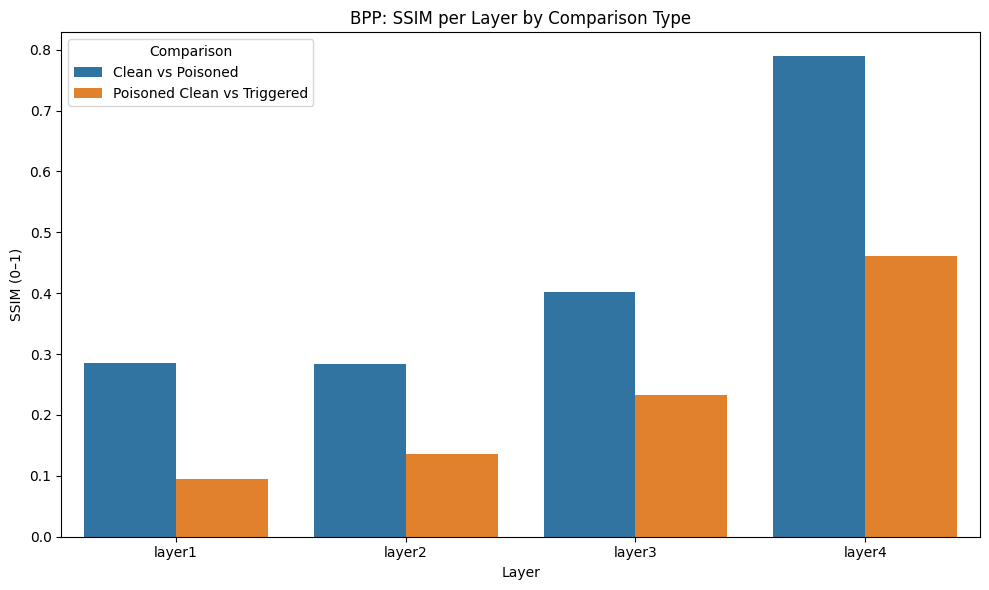

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the metrics dataset
path = '/content/drive/MyDrive/Colab Notebooks/Activations_Bpp_Resnet/metrics_bpp.csv'
df = pd.read_csv(path)

df['Layer'] = pd.Categorical(df['Layer'], categories=sorted(df['Layer'].unique()), ordered=True)

# Filter for SSIM and the relevant comparisons
ssim_df = df[df['Comparison'].isin(['Clean vs Poisoned', 'Poisoned Clean vs Triggered'])]

# Plot a barplot of mean SSIM across layers and comparisons
plt.figure(figsize=(10, 6))
sns.barplot(data=ssim_df, x='Layer', y='SSIM', hue='Comparison', errorbar=None)
plt.title('BPP: SSIM per Layer by Comparison Type')
plt.ylabel('SSIM (0–1)')
plt.xlabel('Layer')
plt.legend(title='Comparison')
plt.tight_layout()
plt.show()

WANET EXPERIMENTS DIFFERENT CLASSES

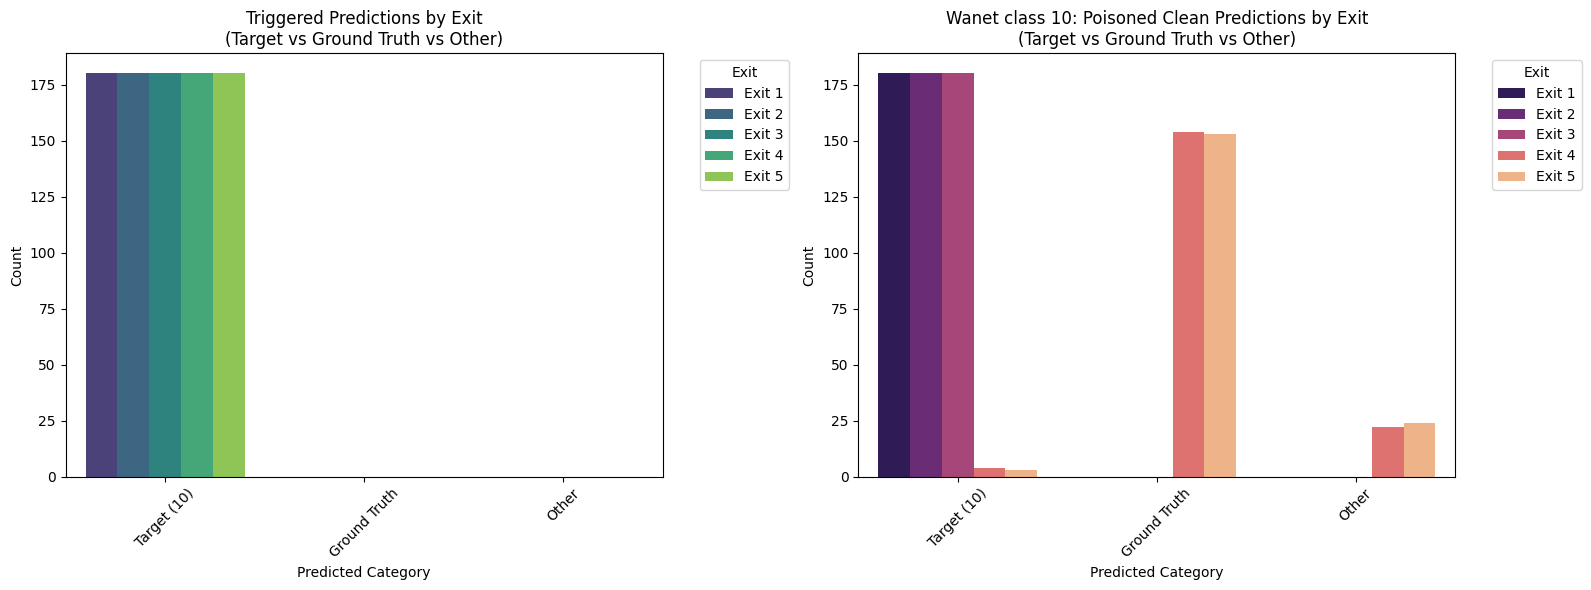

Triggered Predictions Distribution:
Triggered Categorized  Target (10)
Exit                              
Exit 1                         180
Exit 2                         180
Exit 3                         180
Exit 4                         180
Exit 5                         180

Poisoned Clean Predictions Distribution:
Poisoned Clean Categorized  Ground Truth  Other  Target (10)
Exit                                                        
Exit 1                                 0      0          180
Exit 2                                 0      0          180
Exit 3                                 0      0          180
Exit 4                               154     22            4
Exit 5                               153     24            3

=== Analysis ===
Exit Exit 1: ASR = 100.0%, Clean Accuracy = 0.0%
Exit Exit 2: ASR = 100.0%, Clean Accuracy = 0.0%
Exit Exit 3: ASR = 100.0%, Clean Accuracy = 0.0%
Exit Exit 4: ASR = 100.0%, Clean Accuracy = 85.6%
Exit Exit 5: ASR = 100.0%, Clean Ac

In [ ]:
# Re-import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/WaNet_TargetClass_Experiment/EENet/ExitEvaluations/exit_eval_target10.csv"

try:
    df = pd.read_csv(file_path)

    # Function to categorize predictions into '0', 'Ground Truth', and 'Other'
    def categorize_predictions(row, prediction_column):
        prediction = row[prediction_column]
        ground_truth = row['Ground Truth']

        if prediction == 10:
            return 'Target (10)'
        elif prediction == ground_truth:
            return 'Ground Truth'
        else:
            return 'Other'

    # Apply categorization
    df['Triggered Categorized'] = df.apply(lambda row: categorize_predictions(row, 'Triggered Prediction'), axis=1)
    df['Poisoned Clean Categorized'] = df.apply(lambda row: categorize_predictions(row, 'Poisoned Clean Prediction'), axis=1)

    # Set up plotting
    plt.figure(figsize=(16, 6))

    # Define color palette
    colors = ['#e74c3c', '#2ecc71', '#95a5a6']  # Red for Target(0), Green for Ground Truth, Gray for Other

    # Plot Triggered Categorized predictions
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='Triggered Categorized', hue='Exit',
                  palette='viridis', order=['Target (10)', 'Ground Truth', 'Other'])
    plt.title('Triggered Predictions by Exit\n(Target vs Ground Truth vs Other)')
    plt.xlabel('Predicted Category')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    # Plot Poisoned Clean Categorized predictions
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='Poisoned Clean Categorized', hue='Exit',
                  palette='magma', order=['Target (10)', 'Ground Truth', 'Other'])
    plt.title('Wanet class 10: Poisoned Clean Predictions by Exit\n(Target vs Ground Truth vs Other)')
    plt.xlabel('Predicted Category')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print some summary statistics
    print("Triggered Predictions Distribution:")
    print(df.groupby(['Exit', 'Triggered Categorized']).size().unstack(fill_value=0))
    print("\nPoisoned Clean Predictions Distribution:")
    print(df.groupby(['Exit', 'Poisoned Clean Categorized']).size().unstack(fill_value=0))

    # Calculate success rates
    print("\n=== Analysis ===")
    for exit_num in sorted(df['Exit'].unique()):
        exit_data = df[df['Exit'] == exit_num]

        # For triggered samples
        triggered_target = len(exit_data[exit_data['Triggered Categorized'] == 'Target (10)'])
        triggered_total = len(exit_data)
        triggered_asr = (triggered_target / triggered_total) * 100 if triggered_total > 0 else 0

        # For poisoned clean samples
        clean_correct = len(exit_data[exit_data['Poisoned Clean Categorized'] == 'Ground Truth'])
        clean_accuracy = (clean_correct / triggered_total) * 100 if triggered_total > 0 else 0

        print(f"Exit {exit_num}: ASR = {triggered_asr:.1f}%, Clean Accuracy = {clean_accuracy:.1f}%")

except FileNotFoundError:
    print("The required CSV file is missing. Please upload 'exit_comparison537badnetVSclean.csv'.")
except Exception as e:
    print(f"An error occurred: {e}")

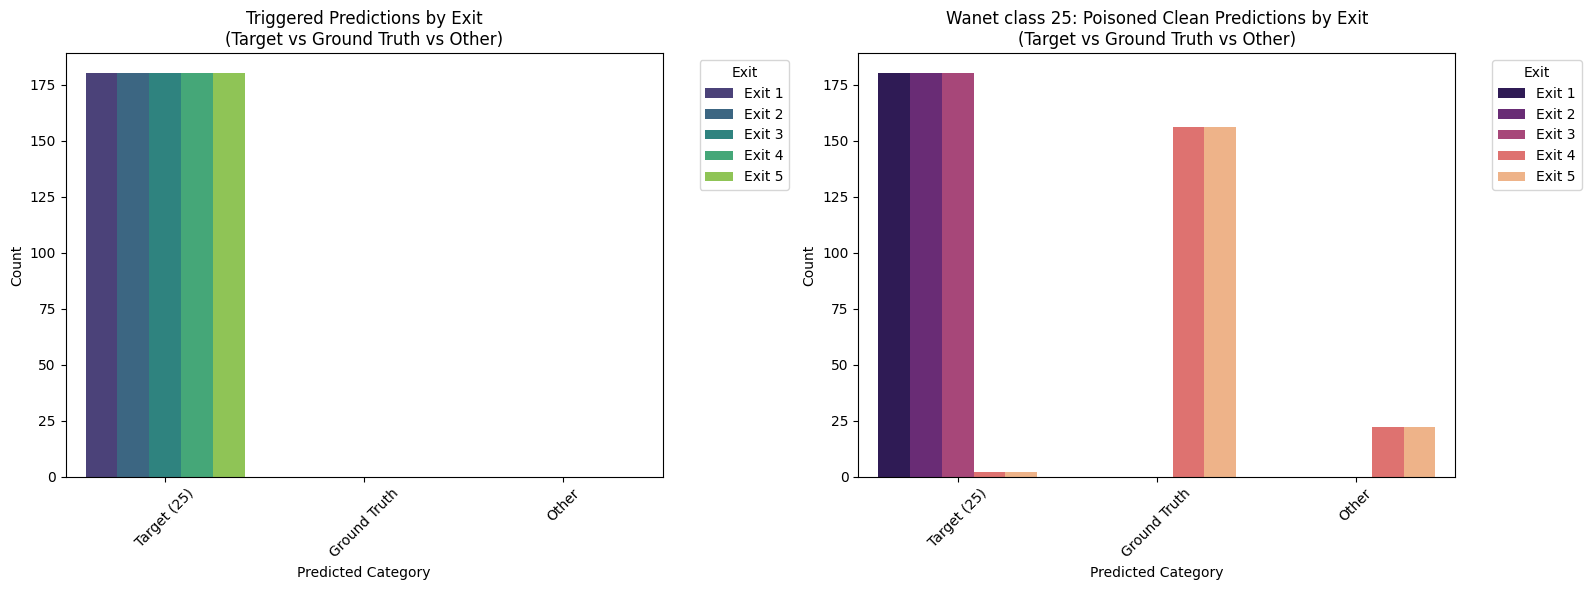

Triggered Predictions Distribution:
Triggered Categorized  Target (25)
Exit                              
Exit 1                         180
Exit 2                         180
Exit 3                         180
Exit 4                         180
Exit 5                         180

Poisoned Clean Predictions Distribution:
Poisoned Clean Categorized  Ground Truth  Other  Target (25)
Exit                                                        
Exit 1                                 0      0          180
Exit 2                                 0      0          180
Exit 3                                 0      0          180
Exit 4                               156     22            2
Exit 5                               156     22            2

=== Analysis ===
Exit Exit 1: ASR = 0.0%, Clean Accuracy = 0.0%
Exit Exit 2: ASR = 0.0%, Clean Accuracy = 0.0%
Exit Exit 3: ASR = 0.0%, Clean Accuracy = 0.0%
Exit Exit 4: ASR = 0.0%, Clean Accuracy = 86.7%
Exit Exit 5: ASR = 0.0%, Clean Accuracy = 8

In [ ]:
# Re-import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/WaNet_TargetClass_Experiment/EENet/ExitEvaluations/exit_eval_target25.csv"

try:
    df = pd.read_csv(file_path)

    # Function to categorize predictions into '0', 'Ground Truth', and 'Other'
    def categorize_predictions(row, prediction_column):
        prediction = row[prediction_column]
        ground_truth = row['Ground Truth']

        if prediction == 25:
            return 'Target (25)'
        elif prediction == ground_truth:
            return 'Ground Truth'
        else:
            return 'Other'

    # Apply categorization
    df['Triggered Categorized'] = df.apply(lambda row: categorize_predictions(row, 'Triggered Prediction'), axis=1)
    df['Poisoned Clean Categorized'] = df.apply(lambda row: categorize_predictions(row, 'Poisoned Clean Prediction'), axis=1)

    # Set up plotting
    plt.figure(figsize=(16, 6))

    # Define color palette
    colors = ['#e74c3c', '#2ecc71', '#95a5a6']  # Red for Target(0), Green for Ground Truth, Gray for Other

    # Plot Triggered Categorized predictions
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='Triggered Categorized', hue='Exit',
                  palette='viridis', order=['Target (25)', 'Ground Truth', 'Other'])
    plt.title('Triggered Predictions by Exit\n(Target vs Ground Truth vs Other)')
    plt.xlabel('Predicted Category')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    # Plot Poisoned Clean Categorized predictions
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='Poisoned Clean Categorized', hue='Exit',
                  palette='magma', order=['Target (25)', 'Ground Truth', 'Other'])
    plt.title('Wanet class 25: Poisoned Clean Predictions by Exit\n(Target vs Ground Truth vs Other)')
    plt.xlabel('Predicted Category')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print some summary statistics
    print("Triggered Predictions Distribution:")
    print(df.groupby(['Exit', 'Triggered Categorized']).size().unstack(fill_value=0))
    print("\nPoisoned Clean Predictions Distribution:")
    print(df.groupby(['Exit', 'Poisoned Clean Categorized']).size().unstack(fill_value=0))

    # Calculate success rates
    print("\n=== Analysis ===")
    for exit_num in sorted(df['Exit'].unique()):
        exit_data = df[df['Exit'] == exit_num]

        # For triggered samples
        triggered_target = len(exit_data[exit_data['Triggered Categorized'] == 'Target (10)'])
        triggered_total = len(exit_data)
        triggered_asr = (triggered_target / triggered_total) * 100 if triggered_total > 0 else 0

        # For poisoned clean samples
        clean_correct = len(exit_data[exit_data['Poisoned Clean Categorized'] == 'Ground Truth'])
        clean_accuracy = (clean_correct / triggered_total) * 100 if triggered_total > 0 else 0

        print(f"Exit {exit_num}: ASR = {triggered_asr:.1f}%, Clean Accuracy = {clean_accuracy:.1f}%")

except FileNotFoundError:
    print("The required CSV file is missing. Please upload 'exit_comparison537badnetVSclean.csv'.")
except Exception as e:
    print(f"An error occurred: {e}")

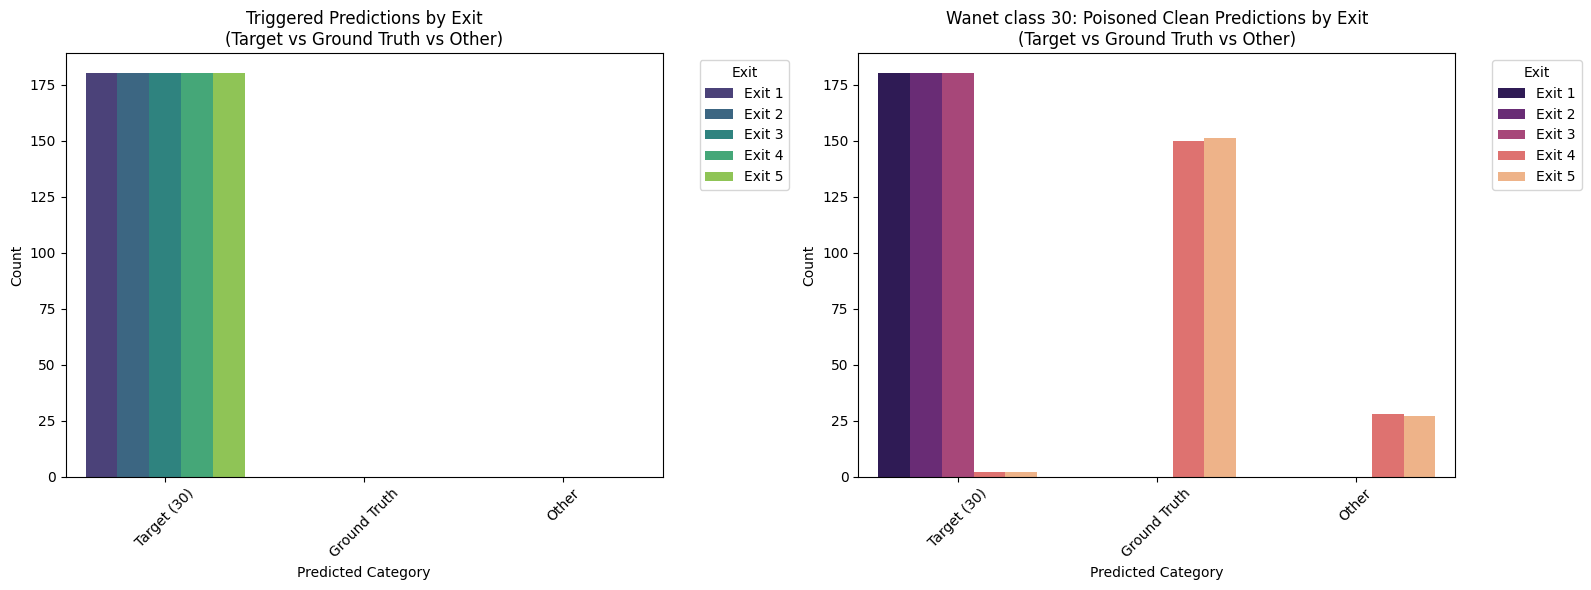

Triggered Predictions Distribution:
Triggered Categorized  Target (30)
Exit                              
Exit 1                         180
Exit 2                         180
Exit 3                         180
Exit 4                         180
Exit 5                         180

Poisoned Clean Predictions Distribution:
Poisoned Clean Categorized  Ground Truth  Other  Target (30)
Exit                                                        
Exit 1                                 0      0          180
Exit 2                                 0      0          180
Exit 3                                 0      0          180
Exit 4                               150     28            2
Exit 5                               151     27            2

=== Analysis ===
Exit Exit 1: ASR = 100.0%, Clean Accuracy = 0.0%
Exit Exit 2: ASR = 100.0%, Clean Accuracy = 0.0%
Exit Exit 3: ASR = 100.0%, Clean Accuracy = 0.0%
Exit Exit 4: ASR = 100.0%, Clean Accuracy = 83.3%
Exit Exit 5: ASR = 100.0%, Clean Ac

In [9]:
# Re-import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/WaNet_TargetClass_Experiment/EENet/ExitEvaluations/exit_eval_target30.csv"

try:
    df = pd.read_csv(file_path)

    # Function to categorize predictions into '0', 'Ground Truth', and 'Other'
    def categorize_predictions(row, prediction_column):
        prediction = row[prediction_column]
        ground_truth = row['Ground Truth']

        if prediction == 30:
            return 'Target (30)'
        elif prediction == ground_truth:
            return 'Ground Truth'
        else:
            return 'Other'

    # Apply categorization
    df['Triggered Categorized'] = df.apply(lambda row: categorize_predictions(row, 'Triggered Prediction'), axis=1)
    df['Poisoned Clean Categorized'] = df.apply(lambda row: categorize_predictions(row, 'Poisoned Clean Prediction'), axis=1)

    # Set up plotting
    plt.figure(figsize=(16, 6))

    # Define color palette
    colors = ['#e74c3c', '#2ecc71', '#95a5a6']  # Red for Target(0), Green for Ground Truth, Gray for Other

    # Plot Triggered Categorized predictions
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='Triggered Categorized', hue='Exit',
                  palette='viridis', order=['Target (30)', 'Ground Truth', 'Other'])
    plt.title('Triggered Predictions by Exit\n(Target vs Ground Truth vs Other)')
    plt.xlabel('Predicted Category')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    # Plot Poisoned Clean Categorized predictions
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='Poisoned Clean Categorized', hue='Exit',
                  palette='magma', order=['Target (30)', 'Ground Truth', 'Other'])
    plt.title('Wanet class 30: Poisoned Clean Predictions by Exit\n(Target vs Ground Truth vs Other)')
    plt.xlabel('Predicted Category')
    plt.ylabel('Count')
    plt.legend(title='Exit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print some summary statistics
    print("Triggered Predictions Distribution:")
    print(df.groupby(['Exit', 'Triggered Categorized']).size().unstack(fill_value=0))
    print("\nPoisoned Clean Predictions Distribution:")
    print(df.groupby(['Exit', 'Poisoned Clean Categorized']).size().unstack(fill_value=0))

    # Calculate success rates
    print("\n=== Analysis ===")
    for exit_num in sorted(df['Exit'].unique()):
        exit_data = df[df['Exit'] == exit_num]

        # For triggered samples
        triggered_target = len(exit_data[exit_data['Triggered Categorized'] == 'Target (30)'])
        triggered_total = len(exit_data)
        triggered_asr = (triggered_target / triggered_total) * 100 if triggered_total > 0 else 0

        # For poisoned clean samples
        clean_correct = len(exit_data[exit_data['Poisoned Clean Categorized'] == 'Ground Truth'])
        clean_accuracy = (clean_correct / triggered_total) * 100 if triggered_total > 0 else 0

        print(f"Exit {exit_num}: ASR = {triggered_asr:.1f}%, Clean Accuracy = {clean_accuracy:.1f}%")

except FileNotFoundError:
    print("The required CSV file is missing. Please upload 'exit_comparison537badnetVSclean.csv'.")
except Exception as e:
    print(f"An error occurred: {e}")